# Problem Statement

## Business Understanding

You work for a consumer finance company which specialises in lending various types of loans to urban customers. When the company receives a loan application, the company has to make a decision for loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s decision:

* If the applicant is **likely to repay the loan**, then not approving the loan results in a **loss of business** to the company

* If the applicant is **not likely to repay the loan**, i.e. he/she is likely to default, then approving the loan may lead to a **financial loss** for the company

 

The data given below contains the information about past loan applicants and whether they ‘defaulted’ or not. The aim is to identify patterns which indicate if a person is likely to default, which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc.

 

In this case study, you will use EDA to understand how **consumer attributes** and **loan attributes** influence the tendency of default.

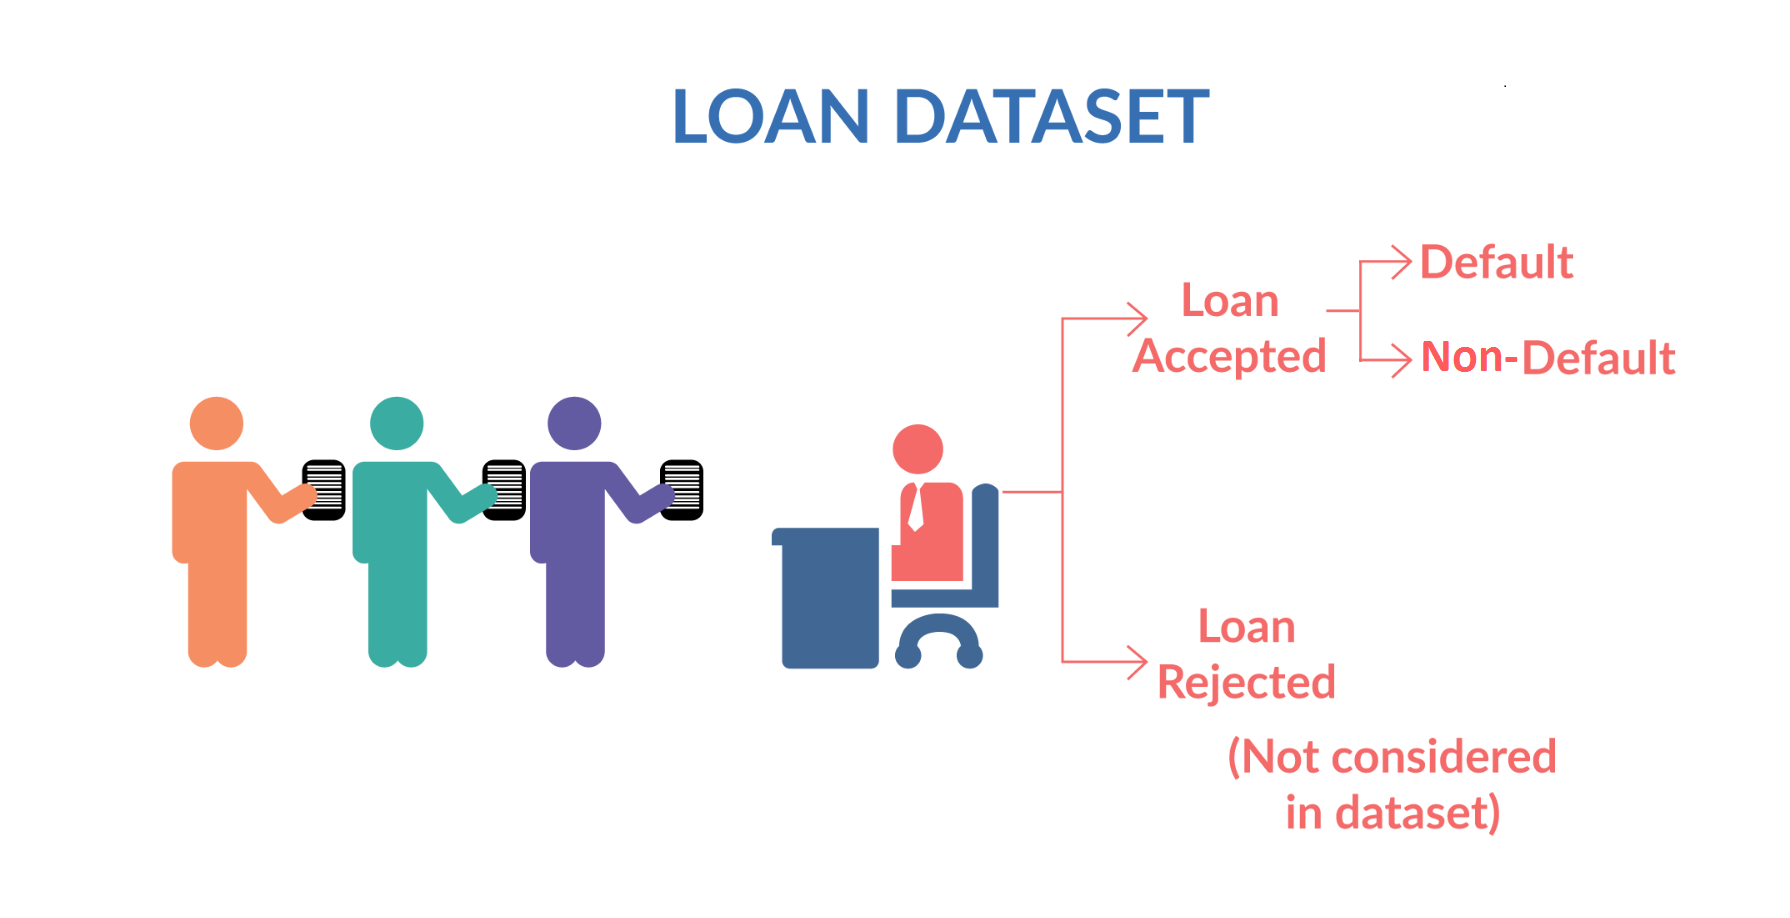
Figure Loan Data Set can also refer to link: [Upgrad Lending Club Case Study](https://learn.upgrad.com/course/4617/segment/27462/164543/505323/2600603)

When a person applies for a loan, there are **two types of decisions** that could be taken by the company:

1. **Loan accepted**: If the company approves the loan, there are 3 possible scenarios described below:

    * **Fully paid**: Applicant has fully paid the loan (the principal and the interest rate)

    * **Current**: Applicant is in the process of paying the instalments, i.e. the tenure of the loan is not yet completed. These  candidates are not labelled as 'defaulted'.

    * **Charged-off**: Applicant has not paid the instalments in due time for a long period of time, i.e. he/she has **defaulted** on the loan 

2. **Loan rejected**: The company had rejected the loan (because the candidate does not meet their requirements etc.). Since the loan was rejected, there is no transactional history of those applicants with the company and so this data is not available with the company (and thus in this dataset)

# Business Objectives

This company is the largest online loan marketplace, facilitating personal loans, business loans, and financing of medical procedures. Borrowers can easily access lower interest rate loans through a fast online interface. 

 

Like most other lending companies, lending loans to ‘risky’ applicants is the largest source of financial loss (called credit loss). The credit loss is the amount of money lost by the lender when the borrower refuses to pay or runs away with the money owed. In other words, borrowers who **default** cause the largest amount of loss to the lenders. In this case, the customers labelled as 'charged-off' are the 'defaulters'. 

 

If one is able to identify these risky loan applicants, then such loans can be reduced thereby cutting down the amount of credit loss. Identification of such applicants using EDA is the aim of this case study.

 

In other words, the company wants to understand the **driving factors (or driver variables)** behind loan default, i.e. the variables which are strong indicators of default.  The company can utilise this knowledge for its portfolio and risk assessment. 


To develop your understanding of the domain, you are advised to independently research a little about risk analytics (understanding the types of variables and their significance should be enough).

### Note: Evaluation Rubric For reference
1. Data understanding  (10%)
2. Data Cleaning and Manipulation (20%)
3. Data analysis (40%)
4. Presentation and Recommendations (20%)
5. Conciseness and readability of the code (10%)

## Thought Process 

1. Exporing Data 
    For understanding or to explore data set, first step is to load the data and and analyse using 
      * df.info
      * df.shape
      * df[listofcols].describe().T T : to transpose the data for easy visualization

2. Cleaning the data, manipulation (or impute the data) Data cleaning and imputation includes :
    - look for null data, using df.isnull().sum() : gives number of null values in all columns in df
    - use data.isnull().mean()*100 to get the feel of missing values in every column
    - Check for duplicate values using : data.duplicated.sum() / data.duplicated.any(): duplicate values will influence the final result / outcome and will add bias to the data. 
    - So its very much critical to find duplicates and drop them as required. drop data using : data.drop_duplicates(subset=None, inplace=True)
    - **Note**: alternatively find unique values in each column using df.nunique() to count the number of unique values in a given axis and drop the duplicates using df.drop(same_value_cols, axis=1)
    - drop all columns which has not valid values (i.e. all null values) such columns does not add to any value for analysis.
    
3. Data analysis includes:
    - Check for mean, median, mode , and std deviations, which gives us insights into the data and distribution of data.
    - Check for outliers : can be checked using visualization boxplot, the boxplot clearly shows the outliers , whiskers of the box plot indicate the outliers.
    - Based on above analysis, we can have outlier threshold of interquartile ranges q1 as 0.05 and q4 as 0.95 (5% percentile to 95% percentile) and remove the outliers.
    - Outliers can impact analysis as the analysis will be hearvily biased towards outliers, so the outliers needs to be identfied and replaced with threshold values (need to rephrase these)
    
    **NOTE** : check EDA session by Aditya B : on replacing data using threadsholds  time frame for the same in the video : 1:56:13 
    link : [EDA session by Aditya B](https://live.upgrad.com/summary/oa1QB1mFMoFniNGUDjsreNfCZ3NTAse7)
    
    - Correlation function : this is similar to redundant / duplicate data, adds biases to the model and we need to give importance to correlated features and its recommended to drop highly correlated features to avoid biases to the outcome / model.
    - Heat map can help in indentifying highly correlated features.
    
    **TODO** : add more details on data analysis and cleaning and path we want to take for case study.
    
  

## Data import and exploration, import loan.csv and dict in different data frames and do initial clean up like stripping space, null/nan values and dropping columns with all nan values 

In [800]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


from datetime import datetime
%matplotlib inline

df = pd.read_csv("loan.csv", low_memory=False)
df.columns = df.columns.str.replace(' ', '')

data_dict = pd.read_excel("Data_Dictionary.xlsx")
data_dict.columns = data_dict.columns.str.replace(' ', '')
data_dict.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117 entries, 0 to 116
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   LoanStatNew  115 non-null    object
 1   Description  116 non-null    object
dtypes: object(2)
memory usage: 2.0+ KB


In [801]:
data_dict.isnull().sum()

LoanStatNew    2
Description    1
dtype: int64

In [802]:
df.delinq_2yrs.describe()

count    39717.000000
mean         0.146512
std          0.491812
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         11.000000
Name: delinq_2yrs, dtype: float64

<h3><strong>Check for NaN values in rows and remove them from dict, from visual inspectation of dictionary excel sheet last 2 rows has&nbsp;empty values which is removed using dropna()
</strong>
</h3>

In [803]:
data_dict = data_dict.dropna()
data_dict.tail(5)

,LoanStatNew,Description
110,total_rev_hi_lim,Total revolving high credit/credit limit
111,url,URL for the LC page with listing data.
112,verification_status,"Indicates if income was verified by LC, not ve..."
113,verified_status_joint,Indicates if the co-borrowers' joint income wa...
114,zip_code,The first 3 numbers of the zip code provided b...


<h3><strong>Find any duplicate values and if present drop them, not necessary for dict but lets have it&nbsp;</strong></h3>

In [804]:
if data_dict.duplicated().any():
    data_dict.drop_duplicates(subset=None, inplace=True)
data_dict.shape

(115, 2)

In [805]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 111 columns):
 #    Column                          Dtype  
---   ------                          -----  
 0    id                              int64  
 1    member_id                       int64  
 2    loan_amnt                       int64  
 3    funded_amnt                     int64  
 4    funded_amnt_inv                 float64
 5    term                            object 
 6    int_rate                        object 
 7    installment                     float64
 8    grade                           object 
 9    sub_grade                       object 
 10   emp_title                       object 
 11   emp_length                      object 
 12   home_ownership                  object 
 13   annual_inc                      float64
 14   verification_status             object 
 15   issue_d                         object 
 16   loan_status                     object 
 17   pymnt_plan

In [806]:
data_dict

,LoanStatNew,Description
0,acc_now_delinq,The number of accounts on which the borrower i...
1,acc_open_past_24mths,Number of trades opened in past 24 months.
2,addr_state,The state provided by the borrower in the loan...
3,all_util,Balance to credit limit on all trades
4,annual_inc,The self-reported annual income provided by th...
...,...,...
110,total_rev_hi_lim,Total revolving high credit/credit limit
111,url,URL for the LC page with listing data.
112,verification_status,"Indicates if income was verified by LC, not ve..."
113,verified_status_joint,Indicates if the co-borrowers' joint income wa...


<h3><p><strong>Few columns have extra spaces as the end in the data dictionary. </strong></p>
<p><strong>Lets trim these spaces&nbsp;</strong></p>
    </h3>

In [807]:
data_dict.LoanStatNew = data_dict.LoanStatNew.apply(lambda col : col.strip())
data_dict.LoanStatNew

0             acc_now_delinq
1       acc_open_past_24mths
2                 addr_state
3                   all_util
4                 annual_inc
               ...          
110         total_rev_hi_lim
111                      url
112      verification_status
113    verified_status_joint
114                 zip_code
Name: LoanStatNew, Length: 115, dtype: object

<h3><strong>Now compare column names from df and dictionary to be sure both matches and modify any mismatching columns</strong></h3>

In [808]:
df_columns = df.columns

dict_cols = list(data_dict.LoanStatNew.apply(lambda x : x))
print(len(dict_cols))
mismatch_cols = [col for col in df_columns if col not in dict_cols]

mismatch_dict = {}

for col in mismatch_cols:
    try:
        index = df.columns.get_loc(col)
        mismatch_dict[col] = index
    except :
        pass
 
print(mismatch_dict)
print("Num of columns in DataFrame and Dict Match ?:", len(dict_cols) == len(df_columns))

115
{'verification_status_joint': 55}
Num of columns in DataFrame and Dict Match ?: False


<h3>From above results, since df columns len and dict col len does not match, <br />Manually inspect the dictionary with closest matching name and <br />Rename all the mismatching column names in DataFrame</h3>
<p>&nbsp;</p>

In [809]:
df.rename(columns = {'verification_status_joint':'verified_status_joint'},inplace = True)


In [810]:
# Loop through each column to analyze the dtype and null values using mean() function / sum() function
# TODO dump these in file no need to print
for col in df.columns:
    if df[col].isnull().mean()*100 == 0 :
        print("Column Name          : ",col)
        print("Data Type            : ",df[col].dtype)
        print("Number of NnN Values : ",df[col].isnull().mean()*100,"%")
        print("Description          : ",data_dict[data_dict.LoanStatNew == col].iloc[0,1])

        print(" ##############  ##############  ##############  ############## ")

Column Name          :  id
Data Type            :  int64
Number of NnN Values :  0.0 %
Description          :  A unique LC assigned ID for the loan listing.
 ##############  ##############  ##############  ############## 
Column Name          :  member_id
Data Type            :  int64
Number of NnN Values :  0.0 %
Description          :  A unique LC assigned Id for the borrower member.
 ##############  ##############  ##############  ############## 
Column Name          :  loan_amnt
Data Type            :  int64
Number of NnN Values :  0.0 %
Description          :  The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.
 ##############  ##############  ##############  ############## 
Column Name          :  funded_amnt
Data Type            :  int64
Number of NnN Values :  0.0 %
Description          :  The total amount committed to that loan at that point in time.
 ######

In [811]:
df.delinq_2yrs.describe()

count    39717.000000
mean         0.146512
std          0.491812
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         11.000000
Name: delinq_2yrs, dtype: float64

In [812]:
df.shape

(39717, 111)

In [813]:
df.head(3)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [814]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 111 columns):
 #    Column                          Dtype  
---   ------                          -----  
 0    id                              int64  
 1    member_id                       int64  
 2    loan_amnt                       int64  
 3    funded_amnt                     int64  
 4    funded_amnt_inv                 float64
 5    term                            object 
 6    int_rate                        object 
 7    installment                     float64
 8    grade                           object 
 9    sub_grade                       object 
 10   emp_title                       object 
 11   emp_length                      object 
 12   home_ownership                  object 
 13   annual_inc                      float64
 14   verification_status             object 
 15   issue_d                         object 
 16   loan_status                     object 
 17   pymnt_plan

In [815]:
# Parsing through all columns with a aim to find all totally NULL/NaN columns
columns = data_dict.LoanStatNew

#Last two entries of data_dict are NaN, so removing it 
columns = columns.dropna()

# Creating an empty array for null columns
null_columns = []

#Parsing all the columns
for col in columns:
    try:
        if df[col].isnull().all() == True:
            null_columns.append(col)
    except :
        pass

#Checking the count of null columns found
print(len(null_columns))

# Printing the null columns
print(null_columns)

54
['acc_open_past_24mths', 'all_util', 'annual_inc_joint', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 'dti_joint', 'il_util', 'inq_fi', 'inq_last_12m', 'max_bal_bc', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_last_major_derog', 'mths_since_rcnt_il', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq', 'mths_since_recent_inq', 'mths_since_recent_revol_delinq', 'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'open_acc_6m', 'open_il_12m', 'open_il_24m', 'open_il_6m', 'open_rv_12m', 'open_rv_24m', 'pct_tl_nvr_dlq', 'percent_bc_gt_75', 'tot_coll_amt', 'tot_cur_bal', 'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bal_il', 'total_bc_limit', 'total_cu_tl', 'total_il_high_credit_limit', 'total_rev_hi_lim', 'verified_status_j

In [816]:
df.shape

(39717, 111)

In [817]:
df.delinq_2yrs.describe()

count    39717.000000
mean         0.146512
std          0.491812
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         11.000000
Name: delinq_2yrs, dtype: float64

In [818]:
# Droping all the newly found null/nan columns in single command
df = df.drop(null_columns, axis=1)

In [819]:
df.shape

(39717, 57)

In [820]:
# df.duplicated().any() returns : True if there is at least one duplicate row in the DataFrame, and False otherwise
if df.duplicated().any():
    df.drop_duplicates(subset=None, inplace=True)

print(df.shape)

# df.duplicated().all() returns True if all rows in the DataFrame are duplicates, and False otherwise
if df.duplicated().all():
    df.drop_duplicates(subset=None, inplace=True)

print(df.shape)

(39717, 57)
(39717, 57)


In [821]:
df.delinq_2yrs.describe()

count    39717.000000
mean         0.146512
std          0.491812
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         11.000000
Name: delinq_2yrs, dtype: float64

In [822]:
#Finding columns where all entries are exactly same
same_value_cols = df.columns[df.nunique() == 1]
print(same_value_cols)

Index(['pymnt_plan', 'initial_list_status', 'collections_12_mths_ex_med',
       'policy_code', 'application_type', 'acc_now_delinq',
       'chargeoff_within_12_mths', 'delinq_amnt', 'tax_liens'],
      dtype='object')


In [823]:
# Dropping the columns where all entries are exactly same
df = df.drop(same_value_cols, axis=1)

In [824]:
df.shape

(39717, 48)

In [825]:
# Drop columns if the % of missing values in col is greater than or equal to 90%
for col in df.columns:
    if df[col].isnull().mean()*100 >= 90:
        print("Droping ",col)
        df.drop(col,axis=1,inplace=True)

Droping  mths_since_last_record
Droping  next_pymnt_d


In [826]:
df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'url', 'desc', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'mths_since_last_delinq', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'out_prncp', 'out_prncp_inv',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'pub_rec_bankruptcies'],
      dtype='object')

In [827]:
df.delinq_2yrs.describe()

count    39717.000000
mean         0.146512
std          0.491812
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         11.000000
Name: delinq_2yrs, dtype: float64

In [828]:
df.shape

(39717, 46)

In [829]:
# Sort and print top 10 NULL values column names
null_rows = df.isnull().sum()
sorted_columns = null_rows.sort_values(ascending=False)
print(sorted_columns[:10])

mths_since_last_delinq    25682
desc                      12940
emp_title                  2459
emp_length                 1075
pub_rec_bankruptcies        697
last_pymnt_d                 71
revol_util                   50
title                        11
last_credit_pull_d            2
out_prncp                     0
dtype: int64


In [830]:
# Date Column that can be candidate for derived matrix
#  #   Column                   Non-Null Count  Dtype  
# ---  ------                   --------------  -----  
# 15  issue_d                  39717 non-null  object 
# 24  earliest_cr_line         39717 non-null  object 
#  40  last_pymnt_d             39646 non-null  object 
#  42  last_credit_pull_d       39715 non-null  object 

# df['issue_d_month'] = df.issue_d.apply(lambda x : datetime.strptime(x[:3], '%b').month)
# df['issue_d_year'] = df.issue_d.apply(lambda x : int(x[-2:]))

# df_dict.loc[len(df_dict.index)] = ['issue_d_month',df_dict[df_dict.LoanStatNew == "issue_d"].iloc[0,1]]
# df_dict.loc[len(df_dict.index)] = ['issue_d_year',df_dict[df_dict.LoanStatNew == "issue_d"].iloc[0,1]]

# df.drop('issue_d',axis=1,inplace=True)

<h3 style="color:blue; font-style: italic;"> 
The column (mths_since_last_delinq) is an import column:
    <ul>
        <li>Its showing history of borrowers who have not paid amount.</li> 
        <li>Its showing list of lawbreaking offenders </li> 
        <li>A total of 25682 rows in mths_since_last_delinq have NaN, but other columns have.</li> 
        <li>Dropping this may lead to a decision where bank may end up giving offenders also a loan.</li> 
        <li>So we have to impute those with a value as 0.</li> </ul>
</h3>

In [831]:
df.mths_since_last_delinq.fillna(0, inplace = True)

In [832]:
def get_mode_and_impute(col):
    mode = df[col].mode().values[0]
    df[col].fillna(mode, inplace = True)


# emp_mode = df.emp_title.mode().values[0]
# print(emp_mode)
# df.emp_title.fillna(emp_mode, inplace = True)

get_mode_and_impute('emp_title')


In [833]:
df.emp_title

0                           US Army
1                             Ryder
2                           US Army
3               AIR RESOURCES BOARD
4          University Medical Group
                    ...            
39712               FiSite Research
39713    Squarewave Solutions, Ltd.
39714                       US Army
39715                       US Army
39716              Evergreen Center
Name: emp_title, Length: 39717, dtype: object

In [834]:
null_rows = df.isnull().sum()
sorted_columns = null_rows.sort_values(ascending=False)
print(sorted_columns[:10])

desc                      12940
emp_length                 1075
pub_rec_bankruptcies        697
last_pymnt_d                 71
revol_util                   50
title                        11
last_credit_pull_d            2
out_prncp                     0
mths_since_last_delinq        0
open_acc                      0
dtype: int64


In [835]:
get_mode_and_impute('emp_length')

In [836]:
df.delinq_2yrs.describe()

count    39717.000000
mean         0.146512
std          0.491812
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         11.000000
Name: delinq_2yrs, dtype: float64

In [837]:
df.delinq_2yrs.fillna(0, inplace = True)

In [838]:
df.delinq_2yrs.describe()

count    39717.000000
mean         0.146512
std          0.491812
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         11.000000
Name: delinq_2yrs, dtype: float64

<h3><strong>pub_rec_bankruptcies is again a special case, not everyone will have a record in this column.</strong><br /><strong>But those borrowers whose have a pub_rec_bankruptcies record have to be considered.</strong><br /><br /><strong>Hence this cant be dropped. Instead it can be imputed by 0</strong></h3>

In [839]:
df.pub_rec_bankruptcies.fillna(0, inplace = True)

In [840]:
null_rows = df.isnull().sum()
sorted_columns = null_rows.sort_values(ascending=False)
print(sorted_columns[:5])

desc                  12940
last_pymnt_d             71
revol_util               50
title                    11
last_credit_pull_d        2
dtype: int64


In [841]:
df.last_pymnt_d.fillna(0, inplace = True)


In [842]:
df.revol_util.fillna(0, inplace = True)


In [843]:
null_rows = df.isnull().sum()
sorted_columns = null_rows.sort_values(ascending=False)
print(sorted_columns[:5])


desc                  12940
title                    11
last_credit_pull_d        2
id                        0
out_prncp                 0
dtype: int64


#### emp_length : Employment length in years. cleaning up unwanted values from this column

In [844]:
df.emp_length = df.emp_length.astype(str).apply(lambda x : x.replace("+","").replace(" years","").replace(" year","").replace("< 1","0"))

df['emp_length'] = df['emp_length'].astype(float)

In [845]:
df.emp_length

0        10.0
1         0.0
2        10.0
3        10.0
4         1.0
         ... 
39712     4.0
39713     3.0
39714     0.0
39715     0.0
39716     0.0
Name: emp_length, Length: 39717, dtype: float64

In [846]:
len(df.term.value_counts()) == len(df.term)

False

In [847]:
# Columns that should be int/float
# Data columns (total 44 columns):
#  #   Column                   Non-Null Count  Dtype  
# ---  ------                   --------------  -----  
#  5   term                     39717 non-null  object 
#  6   int_rate                 39717 non-null  object 
#  11  emp_length               38642 non-null  object 
#  29  revol_util               39667 non-null  object 

df['term'] = df['term'].astype(str).apply(lambda x:x.replace(" months", "").replace(" ", ""))
df['int_rate'] = df['int_rate'].astype(str).apply(lambda x:x.replace("%", ""))
df['revol_util'] = df['revol_util'].astype(str).apply(lambda x:x.replace("%", ""))


In [848]:
# Change from object to int/float

df['term'] = df['term'].astype(int)
df['int_rate'] = df['int_rate'].astype(float)
df['revol_util'] = df['revol_util'].astype(float)
df['emp_length'] = df['emp_length'].astype(int)


In [849]:
df[~(df.emp_length.isnull())].T

,0,1,2,3,4,5,6,7,8,9,...,39707,39708,39709,39710,39711,39712,39713,39714,39715,39716
id,1077501,1077430,1077175,1076863,1075358,1075269,1069639,1072053,1071795,1071570,...,92666,92552,92533,92507,92402,92187,90665,90395,90376,87023
member_id,1296599,1314167,1313524,1277178,1311748,1311441,1304742,1288686,1306957,1306721,...,92661,92542,92529,92502,92390,92174,90607,90390,89243,86999
loan_amnt,5000,2500,2400,10000,3000,5000,7000,3000,5600,5375,...,5000,5000,5000,5000,5000,2500,8500,5000,5000,7500
funded_amnt,5000,2500,2400,10000,3000,5000,7000,3000,5600,5375,...,5000,5000,5000,5000,5000,2500,8500,5000,5000,7500
funded_amnt_inv,4975.0,2500.0,2400.0,10000.0,3000.0,5000.0,7000.0,3000.0,5600.0,5350.0,...,525.0,375.0,675.0,250.0,700.0,1075.0,875.0,1325.0,650.0,800.0
term,36,60,36,36,60,36,60,36,60,60,...,36,36,36,36,36,36,36,36,36,36
int_rate,10.65,15.27,15.96,13.49,12.69,7.9,15.96,18.64,21.28,12.69,...,9.33,9.96,11.22,7.43,8.7,8.07,10.28,8.07,7.43,13.75
installment,162.87,59.83,84.33,339.31,67.79,156.46,170.08,109.43,152.39,121.45,...,159.77,161.25,164.23,155.38,158.3,78.42,275.38,156.84,155.38,255.43
grade,B,C,C,C,B,A,C,E,F,B,...,B,B,C,A,B,A,C,A,A,E
sub_grade,B2,C4,C5,C1,B5,A4,C5,E1,F2,B5,...,B3,B5,C4,A2,B1,A4,C1,A4,A2,E2


In [850]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 46 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       39717 non-null  int64  
 1   member_id                39717 non-null  int64  
 2   loan_amnt                39717 non-null  int64  
 3   funded_amnt              39717 non-null  int64  
 4   funded_amnt_inv          39717 non-null  float64
 5   term                     39717 non-null  int32  
 6   int_rate                 39717 non-null  float64
 7   installment              39717 non-null  float64
 8   grade                    39717 non-null  object 
 9   sub_grade                39717 non-null  object 
 10  emp_title                39717 non-null  object 
 11  emp_length               39717 non-null  int32  
 12  home_ownership           39717 non-null  object 
 13  annual_inc               39717 non-null  float64
 14  verification_status   

In [851]:
df.shape

(39717, 46)

In [852]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,39717.0,683131.913060,210694.132915,54734.00,516221.00,665665.000000,8.377550e+05,1.077501e+06
member_id,39717.0,850463.559408,265678.307421,70699.00,666780.00,850812.000000,1.047339e+06,1.314167e+06
loan_amnt,39717.0,11219.443815,7456.670694,500.00,5500.00,10000.000000,1.500000e+04,3.500000e+04
funded_amnt,39717.0,10947.713196,7187.238670,500.00,5400.00,9600.000000,1.500000e+04,3.500000e+04
funded_amnt_inv,39717.0,10397.448868,7128.450439,0.00,5000.00,8975.000000,1.440000e+04,3.500000e+04
term,39717.0,42.418007,10.622815,36.00,36.00,36.000000,6.000000e+01,6.000000e+01
int_rate,39717.0,12.021177,3.724825,5.42,9.25,11.860000,1.459000e+01,2.459000e+01
installment,39717.0,324.561922,208.874874,15.69,167.02,280.220000,4.307800e+02,1.305190e+03
emp_length,39717.0,5.109500,3.607467,0.00,2.00,5.000000,1.000000e+01,1.000000e+01
annual_inc,39717.0,68968.926377,63793.765790,4000.00,40404.00,59000.000000,8.230000e+04,6.000000e+06


In [853]:
len(df.id)

39717

In [854]:
len(df.member_id)

39717

In [855]:
df.id.value_counts()

1077501    1
568534     1
568659     1
567165     1
568531     1
          ..
785667     1
785659     1
785630     1
785626     1
87023      1
Name: id, Length: 39717, dtype: int64

In [856]:
df.member_id.value_counts()

1296599    1
731393     1
731544     1
729629     1
731390     1
          ..
989001     1
988993     1
988959     1
988954     1
86999      1
Name: member_id, Length: 39717, dtype: int64

### dropping columns id, member_id, desc  as they do not impact analysis

In [857]:
df.drop(['id', 'member_id', 'desc', 'title'], axis=1, inplace=True)

In [858]:
df.loan_status.value_counts()

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

#### There are different methods to remove outliers from a dataframe, but one of the most common ones is to use the Interquartile Range (IQR) method. 

#### The IQR is the difference between the 75th percentile (Q3) and the 25th percentile (Q1) of the data. Any value that is below Q1 - 1.5 * IQR or above Q3 + 1.5 * IQR is considered an outlier. 

#### To remove these outliers, filter the dataframe using a boolean condition based on the IQR, if IQR > 0

In [859]:

def drop_outliers_from_series(colname):
    # calculate the Q1 and Q3
    Q1 = df[colname].quantile(0.25)
    Q3 = df[colname].quantile(0.75)

    # calculate the IQR
    IQR = Q3 - Q1
    
    print("{0} name IQR {1}".format(colname, IQR))
    # filter out the outliers
    df_no_outliers = df[(df[colname] > Q1 - 1.5 * IQR) & (df[colname] < Q3 + 1.5 * IQR)]
    
    return df_no_outliers, Q1, Q3
        
def drop_outliers_from_dataframe(df):
    for column in df.columns:
        df = drop_outliers_from_series(df[column])
    return df

In [860]:
def chart_with_and_without_outliers(col_1, col_2, data=df):

    fig, axs = plt.subplots(ncols=2, figsize=(20, 5))
    sns.boxplot(x=col_1, y=col_2, data=df, ax=axs[0])
    plt.title(f"Bivariant Analysis with out removing outliers : Boxplot for {col_1} and {col_2}")
    
    df_new_value, q1, q3 = drop_outliers_from_series(col_2)
    
    #df_new_value = df[df[col_2] <= df[col_2].describe()["75%"]]
        
    # Plotting boxplot for loan_status and annual_inc columns
    sns.boxplot(x=col_1, y=col_2, data=df_new_value, ax=axs[1])
    plt.title(f"Bivariant Analysis after removing outliers Boxplot for {col_1} and {col_2}")
    
    plt.xlabel(col_1.capitalize())
    plt.ylabel(col_2.capitalize())
   
    # Adding quantile values to the boxplot
    #q1,q3 = plt.gca().get_ybound()
    plt.annotate(f'Q1: {q1:.2f}', xy=(1,q1), xytext=(10,-10), textcoords='offset points')
    plt.annotate(f'Q3: {q3:.2f}', xy=(1,q3), xytext=(10,-10), textcoords='offset points')
    
    plt.show()
    
    print(f"Q1 = {q1} and Q3 = {q3}")



In [861]:
def create_boxplot_and_distplot_bivariant(col_1, col_2, data=df, boxplot_orientation="v"):
    fig, axs = plt.subplots(figsize=(20, 5))
    sns.boxplot(x=col_1, y=col_2, data=df, ax=axs) #orient=boxplot_orientation)
    
    plt.title("Boxplot for "+col_1)
    plt.show()

    #Distribution plot
    sns.displot(data[col_2], ax=axs, color="red")
    plt.title(f"Density Histogram for {col_2}")
    plt.show()
    

In [862]:
def create_countplot(col):
    if is_object_dtype(df[col]) :
        plt.figure(figsize=(10,5))
        sns.countplot(df[col], order=sorted(df[col].unique()))
        plt.title("Countplot for "+col)
        plt.xticks(rotation=90)
        plt.show()

### 

annual_inc name IQR 41896.0


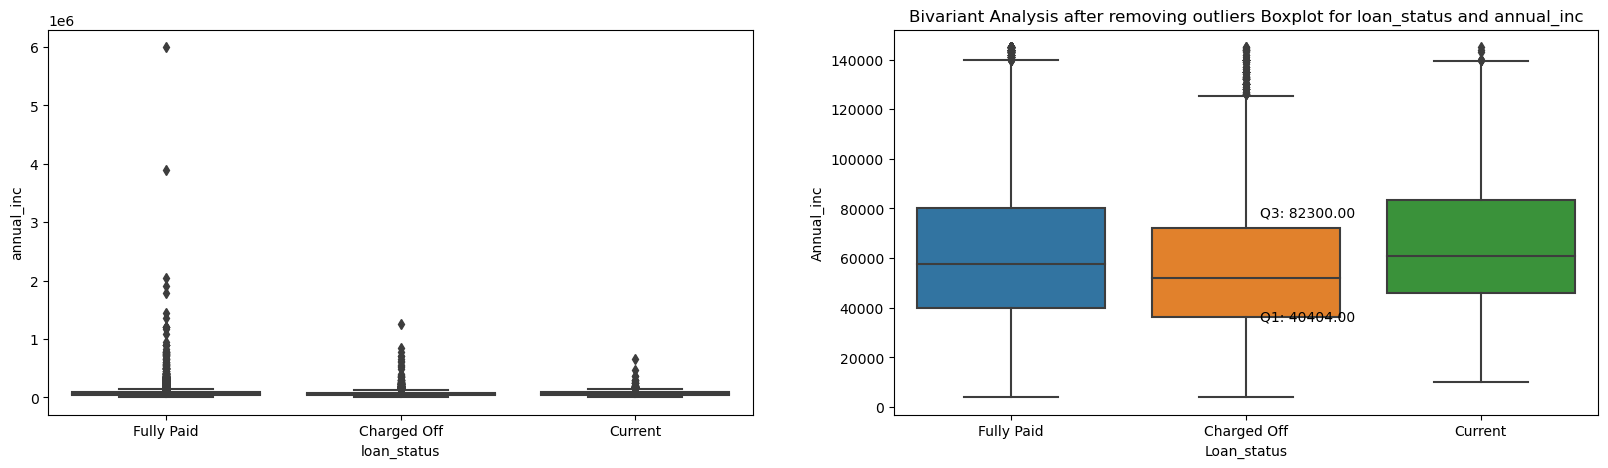

Q1 = 40404.0 and Q3 = 82300.0


In [863]:

chart_with_and_without_outliers('loan_status', 'annual_inc')


loan_amnt name IQR 9500.0


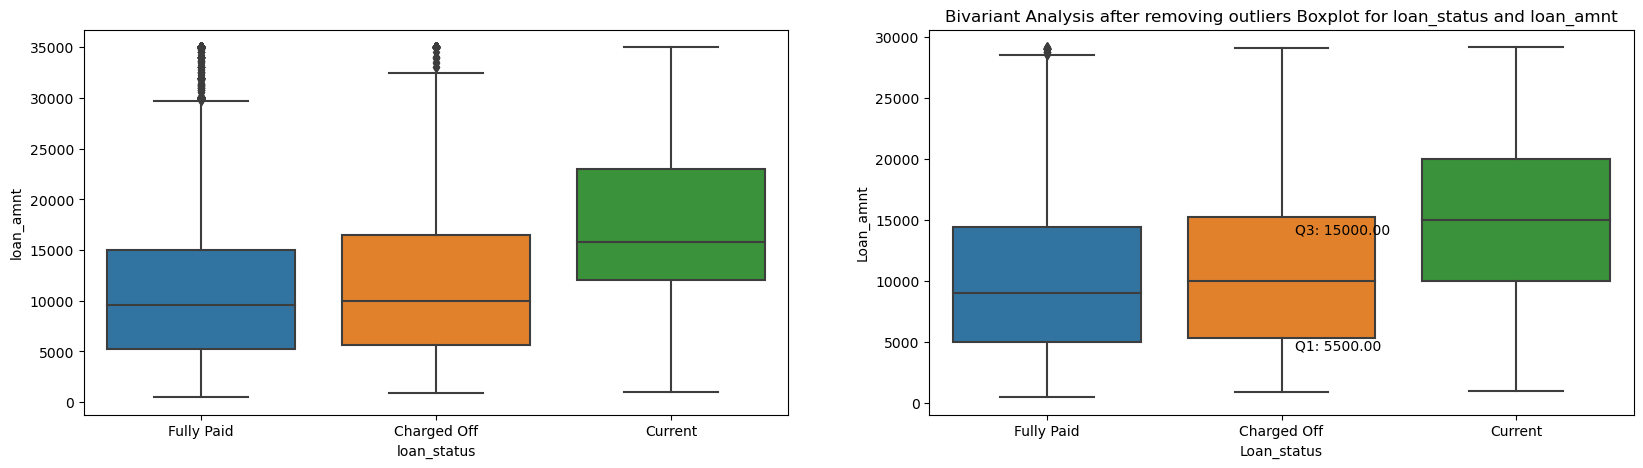

Q1 = 5500.0 and Q3 = 15000.0


In [864]:
# sns.boxplot(x='loan_status',y='loan_amnt',data=df)
# plt.show()
chart_with_and_without_outliers('loan_status', 'loan_amnt')


funded_amnt name IQR 9600.0


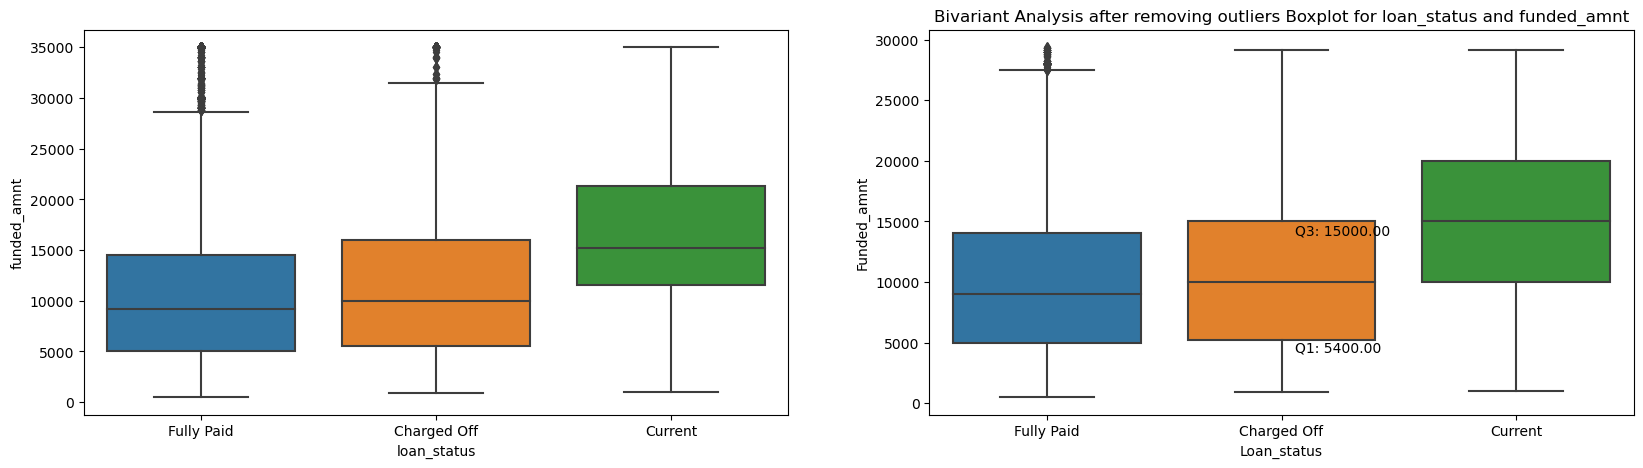

Q1 = 5400.0 and Q3 = 15000.0


In [865]:
# sns.boxplot(x='loan_status',y='funded_amnt',data=df)
# plt.show()
chart_with_and_without_outliers('loan_status', 'funded_amnt')



funded_amnt_inv name IQR 9400.0


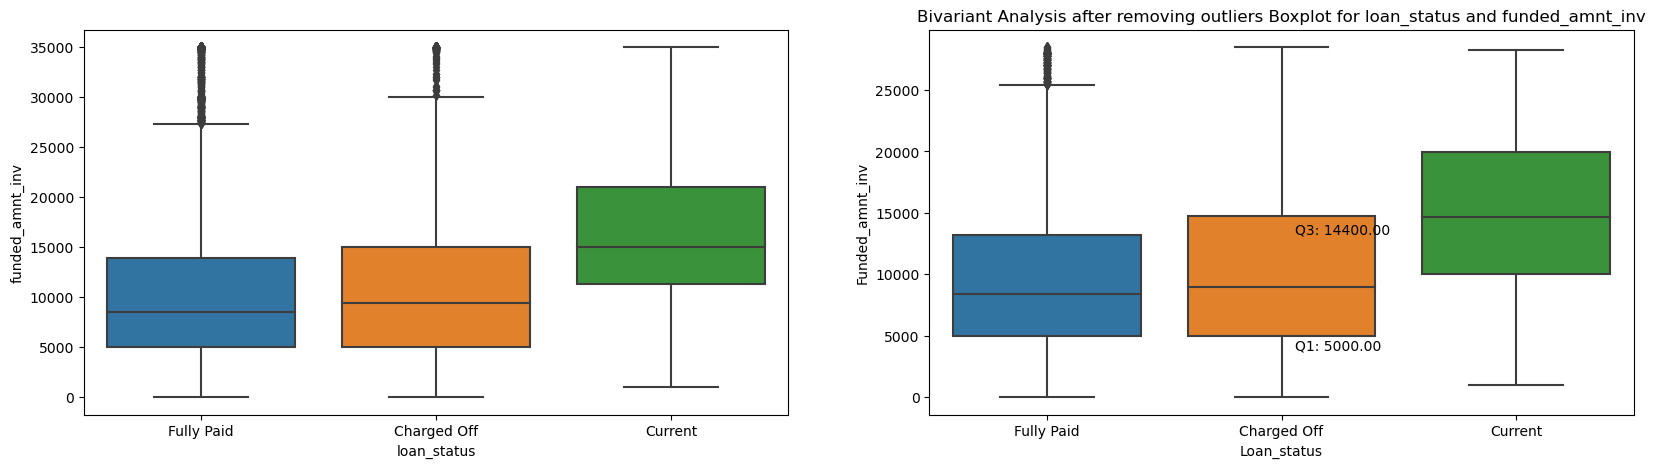

Q1 = 5000.0 and Q3 = 14400.0


In [866]:
chart_with_and_without_outliers('loan_status', 'funded_amnt_inv')



installment name IQR 263.76


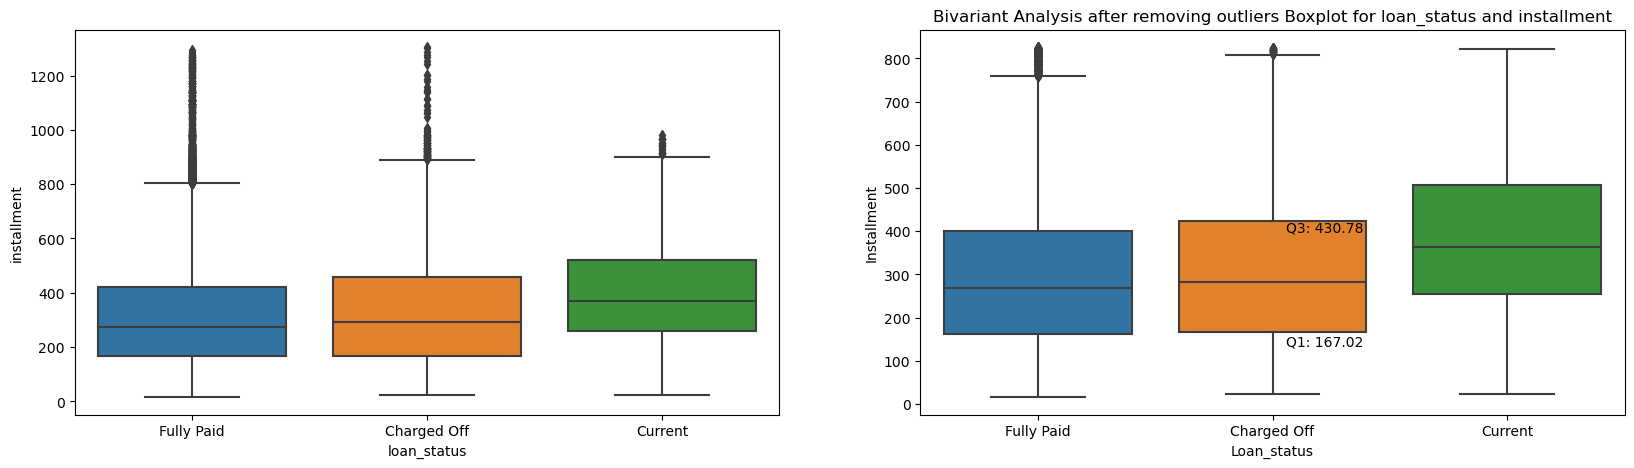

Q1 = 167.02 and Q3 = 430.78


In [867]:
chart_with_and_without_outliers('loan_status', 'installment')

int_rate name IQR 5.34


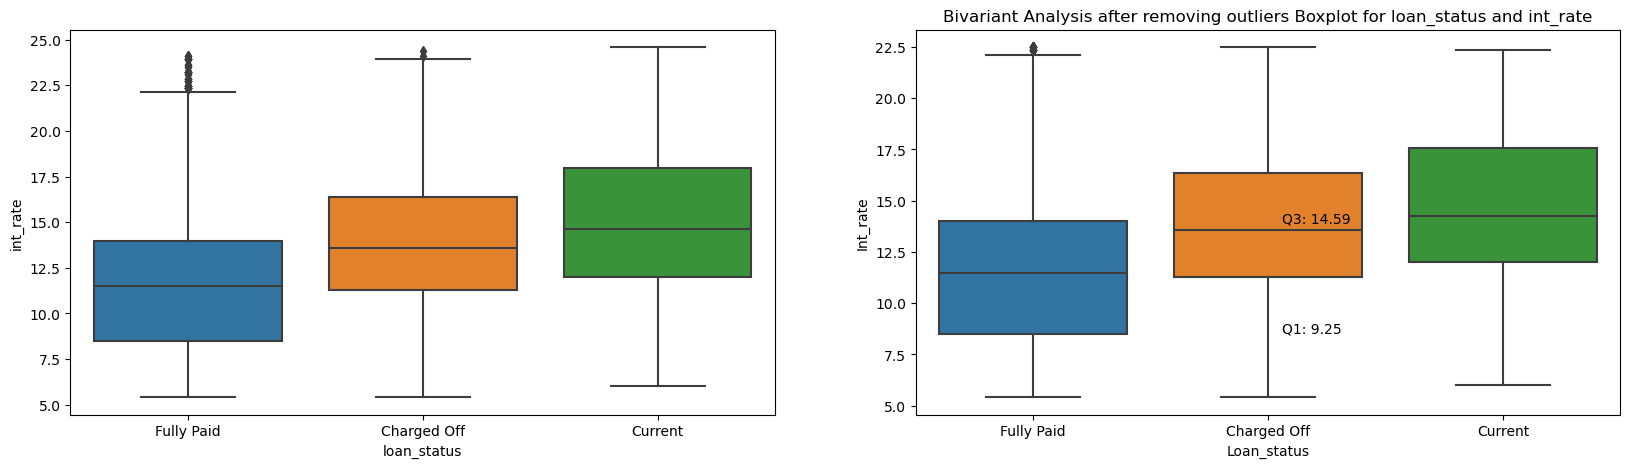

Q1 = 9.25 and Q3 = 14.59


In [868]:
chart_with_and_without_outliers('loan_status', 'int_rate')


emp_length name IQR 8.0


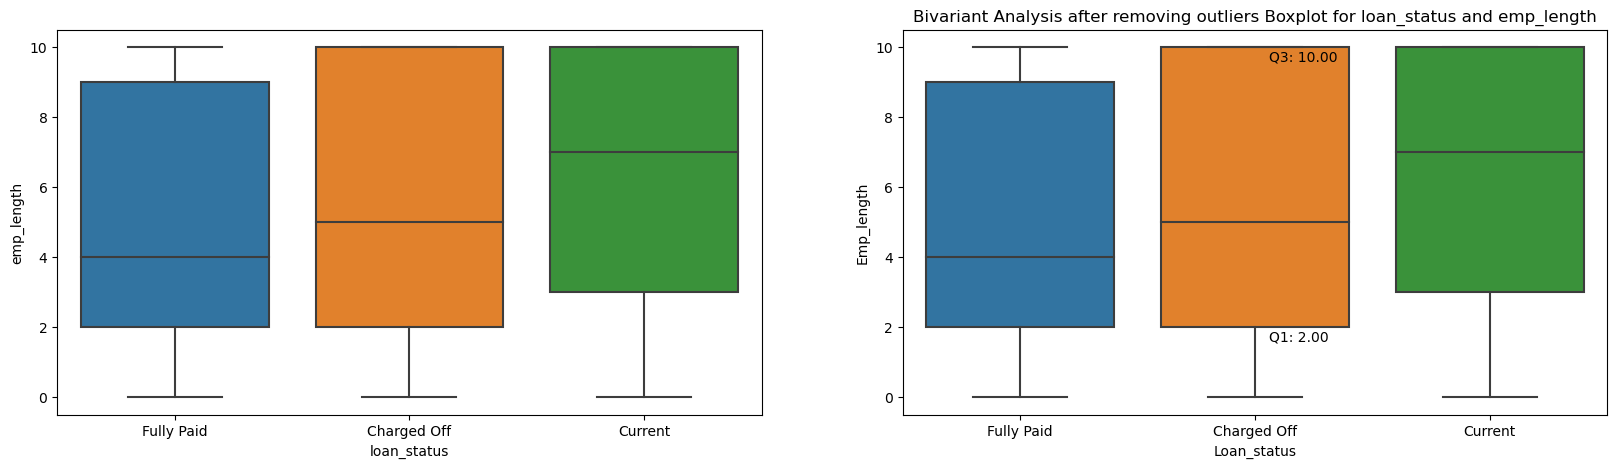

Q1 = 2.0 and Q3 = 10.0


In [869]:
chart_with_and_without_outliers('loan_status', 'emp_length')



dti name IQR 10.430000000000001


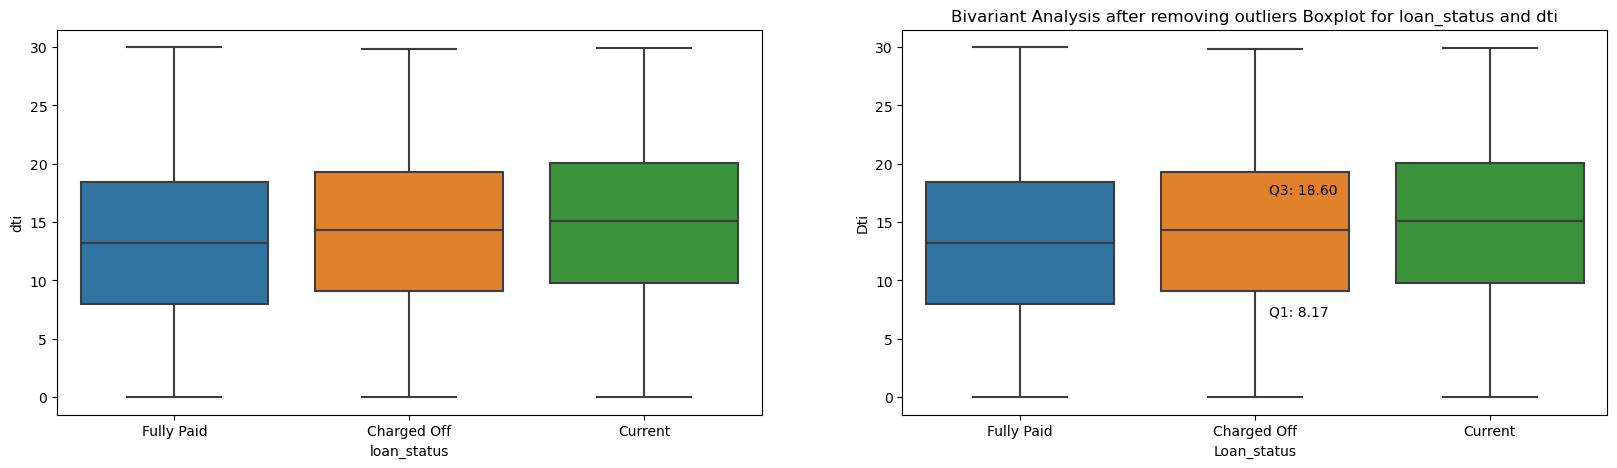

Q1 = 8.17 and Q3 = 18.6


In [870]:
chart_with_and_without_outliers('loan_status', 'dti')

0.0      26125
15.0       252
30.0       247
23.0       247
24.0       241
         ...  
89.0         1
107.0        1
85.0         1
97.0         1
95.0         1
Name: mths_since_last_delinq, Length: 95, dtype: int64


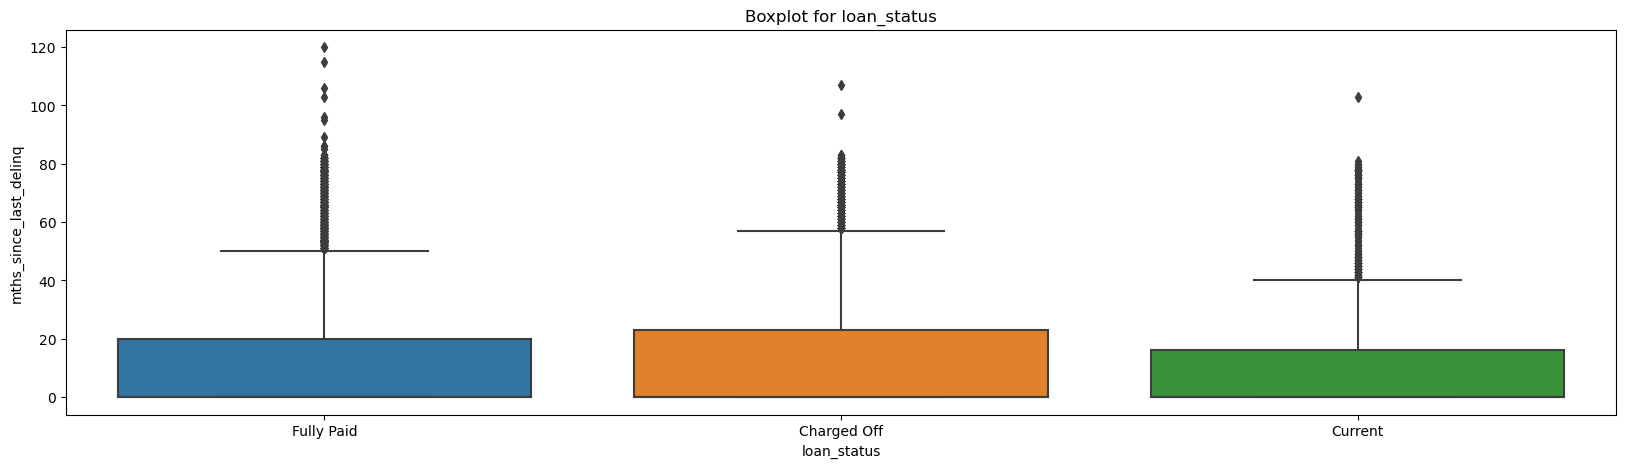

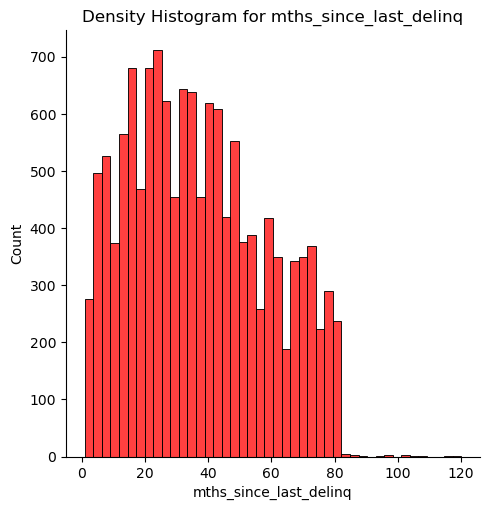

In [871]:
print(df.mths_since_last_delinq.value_counts())
temp_df = df[df.mths_since_last_delinq > 0]
temp_df.mths_since_last_delinq.describe()
create_boxplot_and_distplot_bivariant('loan_status', 'mths_since_last_delinq', temp_df)


open_acc name IQR 6.0


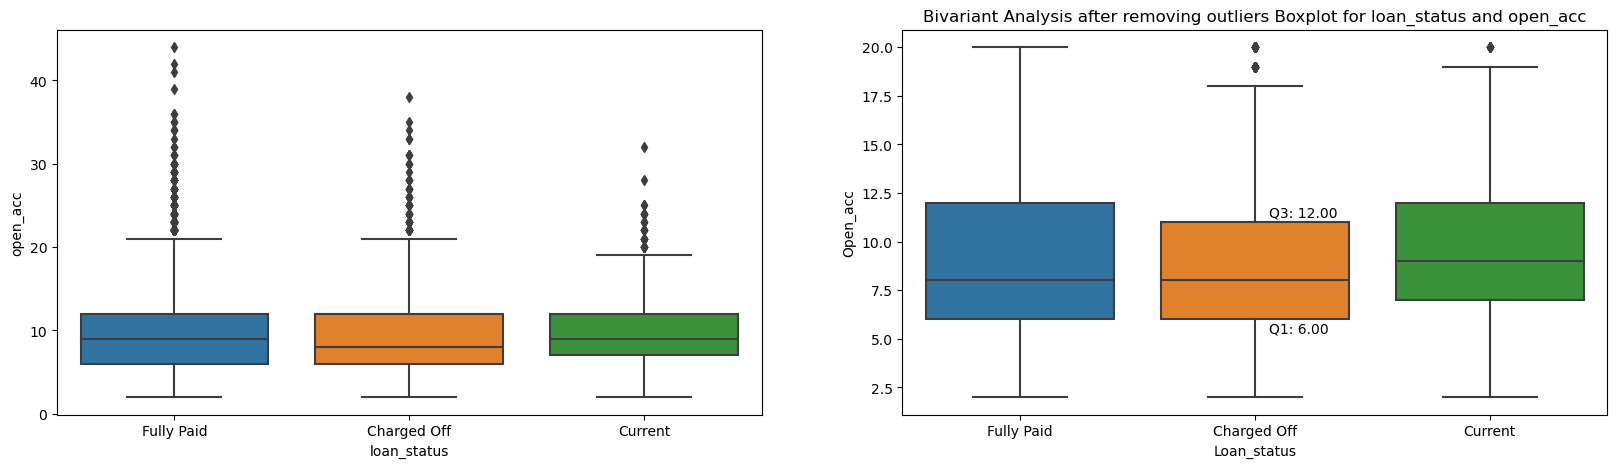

Q1 = 6.0 and Q3 = 12.0


In [872]:
chart_with_and_without_outliers('loan_status', 'open_acc')


In [919]:
df.revol_bal.describe().T

count     39644.000000
mean      13394.975734
std       15893.011532
min           0.000000
25%        3710.750000
50%        8860.000000
75%       17072.000000
max      149588.000000
Name: revol_bal, dtype: float64

revol_bal name IQR 13355.0


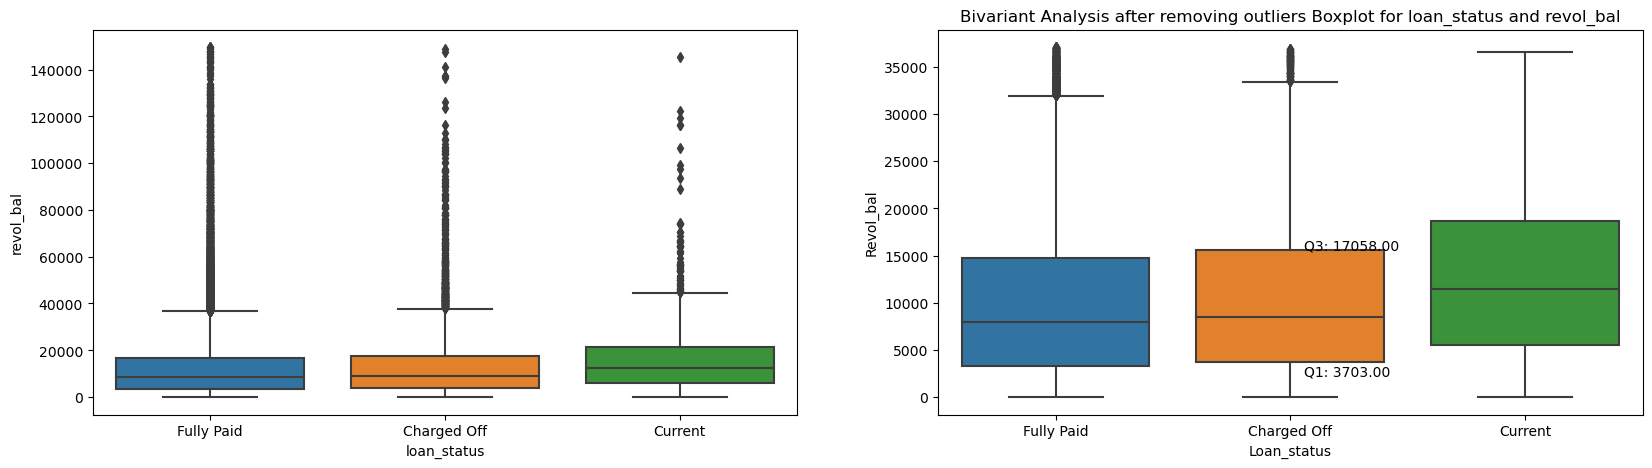

Q1 = 3703.0 and Q3 = 17058.0


In [873]:
#chart_with_and_without_outliers('loan_status', 'revol_bal')


revol_util name IQR 47.0


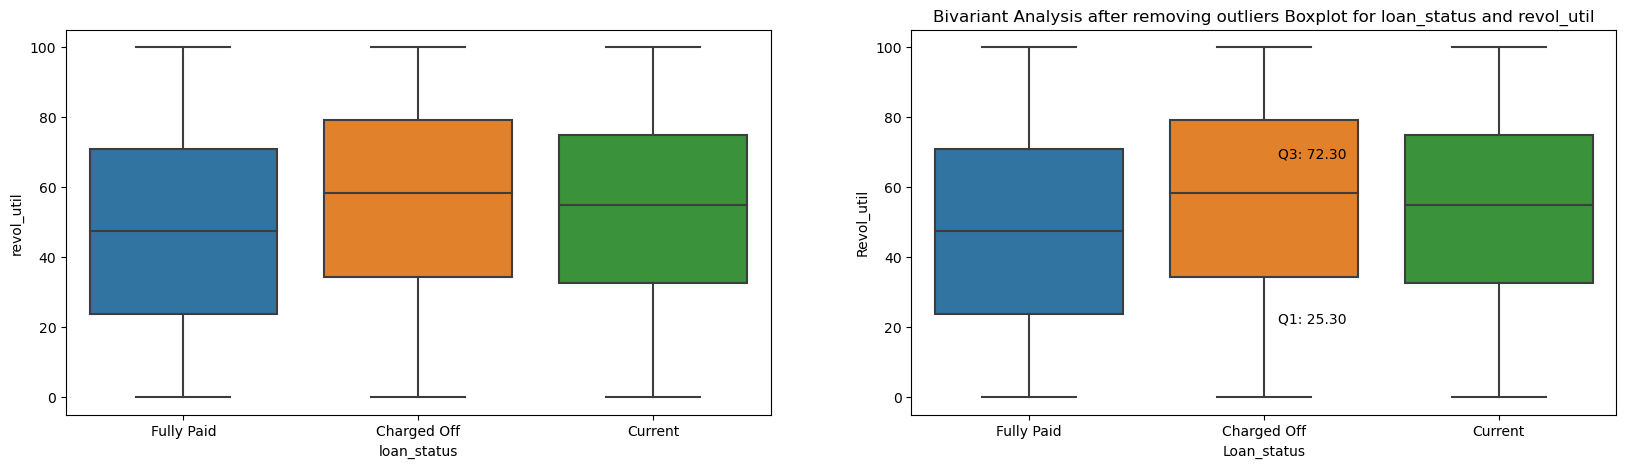

Q1 = 25.3 and Q3 = 72.3


In [874]:
chart_with_and_without_outliers('loan_status', 'revol_util')

total_acc name IQR 16.0


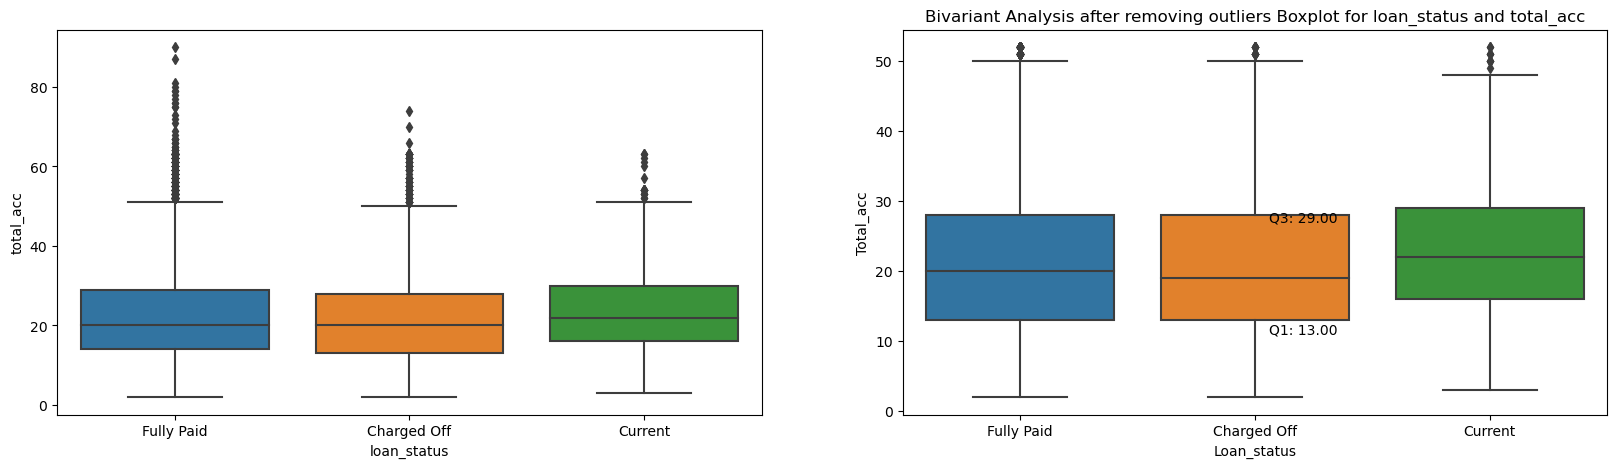

Q1 = 13.0 and Q3 = 29.0


In [875]:
chart_with_and_without_outliers('loan_status', 'total_acc')

total_pymnt name IQR 10957.50304


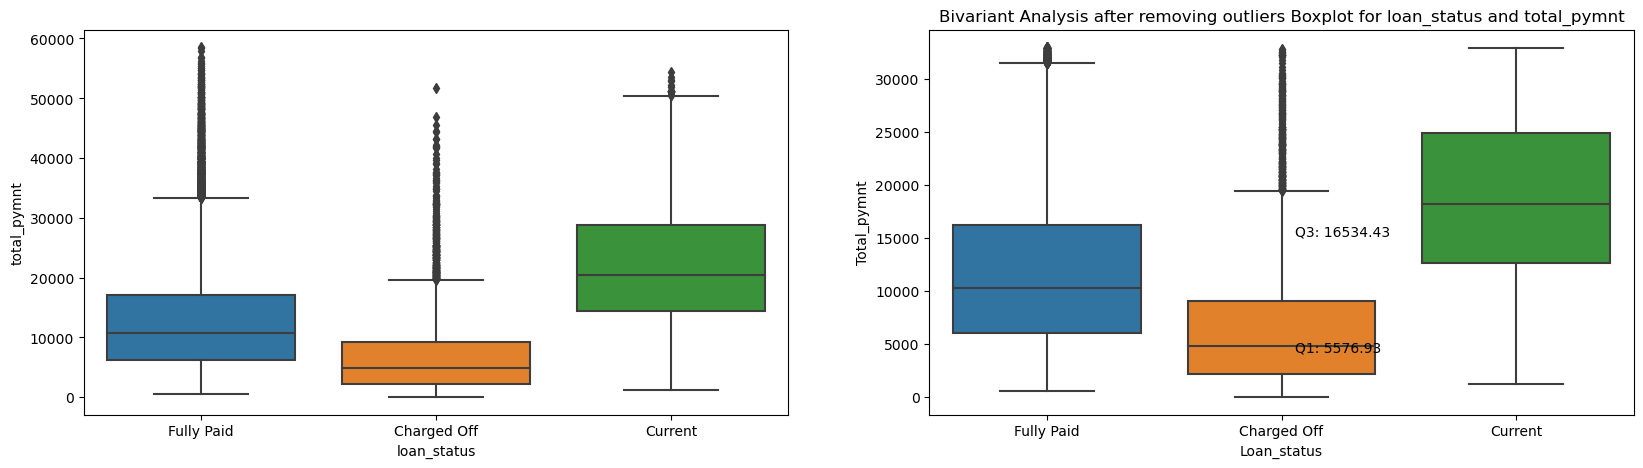

Q1 = 5576.93 and Q3 = 16534.43304


In [876]:

chart_with_and_without_outliers('loan_status', 'total_pymnt')

total_pymnt_inv name IQR 10686.5


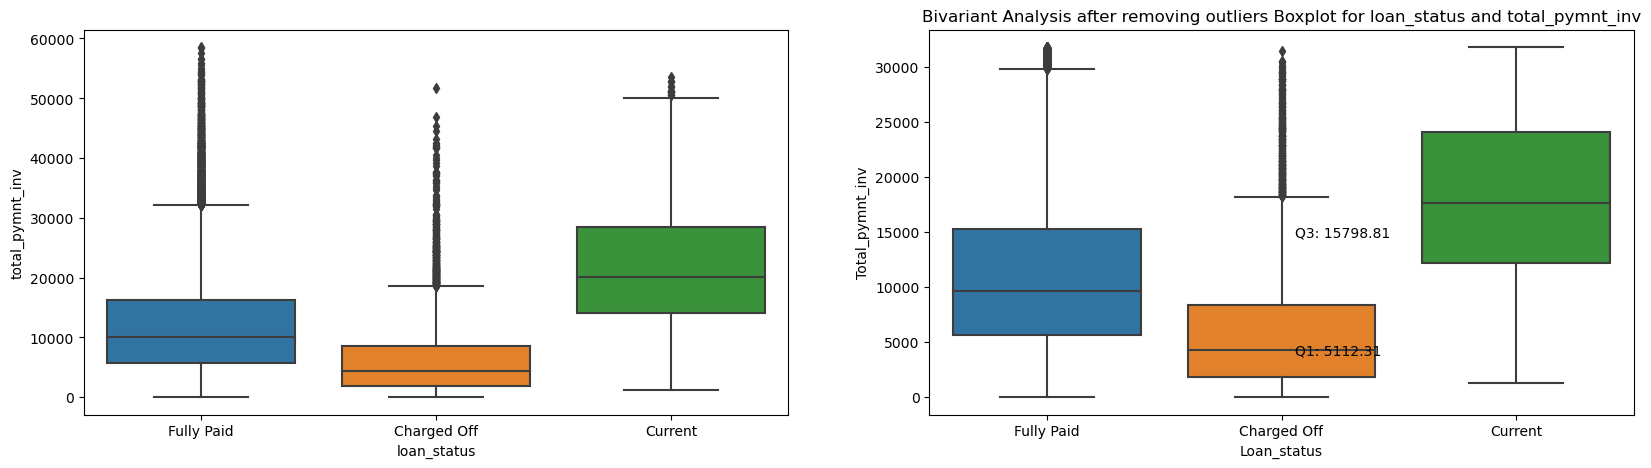

Q1 = 5112.31 and Q3 = 15798.81


In [877]:
chart_with_and_without_outliers('loan_status', 'total_pymnt_inv')

total_rec_prncp name IQR 9053.26


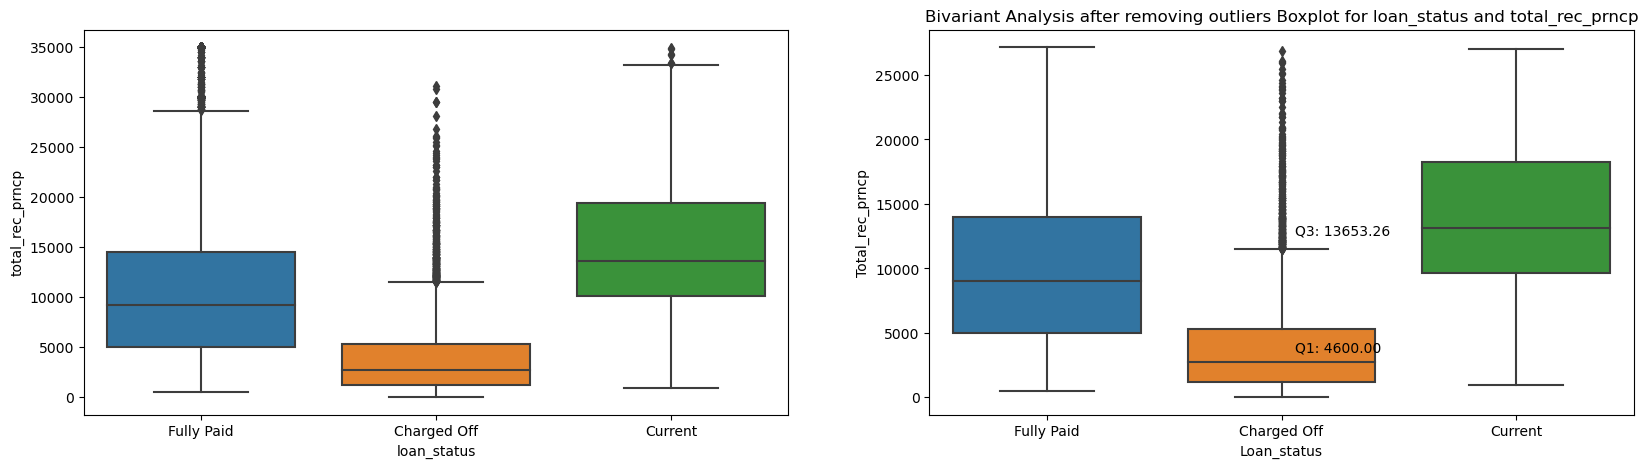

Q1 = 4600.0 and Q3 = 13653.26


In [878]:
chart_with_and_without_outliers('loan_status', 'total_rec_prncp')

total_rec_int name IQR 2171.2200000000003


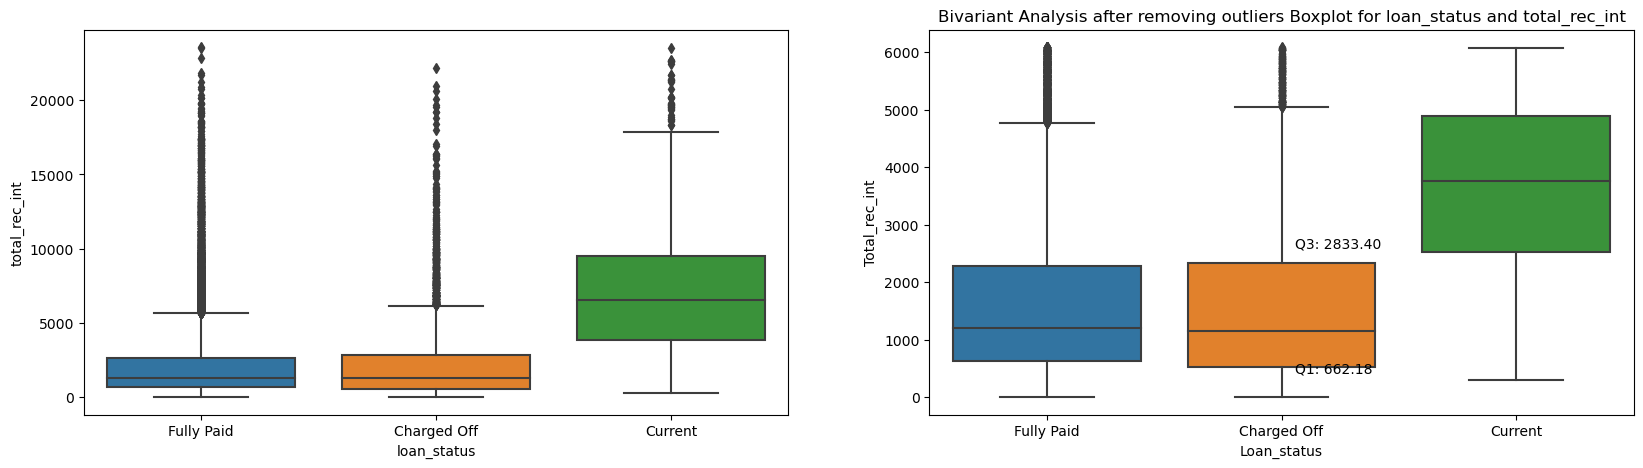

Q1 = 662.18 and Q3 = 2833.4


In [879]:
chart_with_and_without_outliers('loan_status', 'total_rec_int')

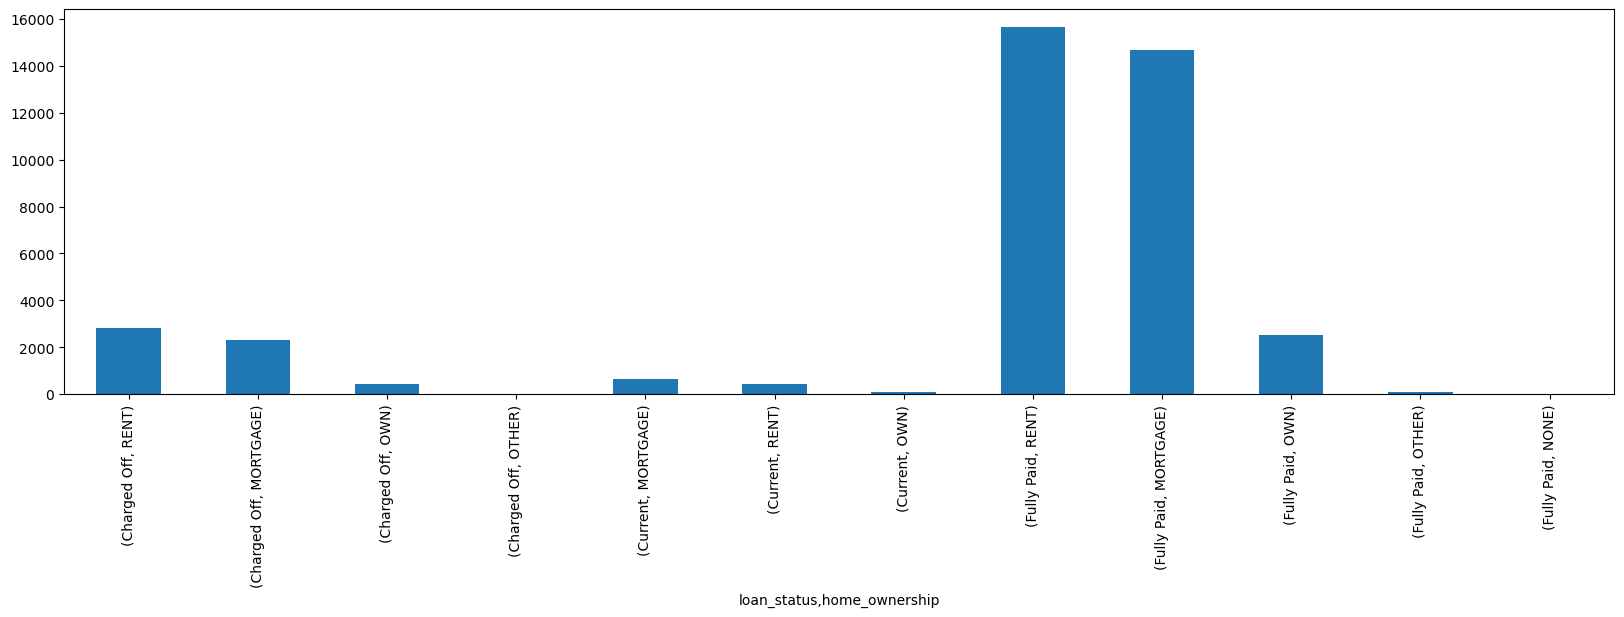

In [880]:
def chart_for_categorical_variables(col_1, col_2):

    fig, axs = plt.subplots(ncols=1, figsize=(20, 5))
    df.groupby(col_1)[col_2].value_counts().plot(kind='bar')
    plt.show()


chart_for_categorical_variables('loan_status','home_ownership')


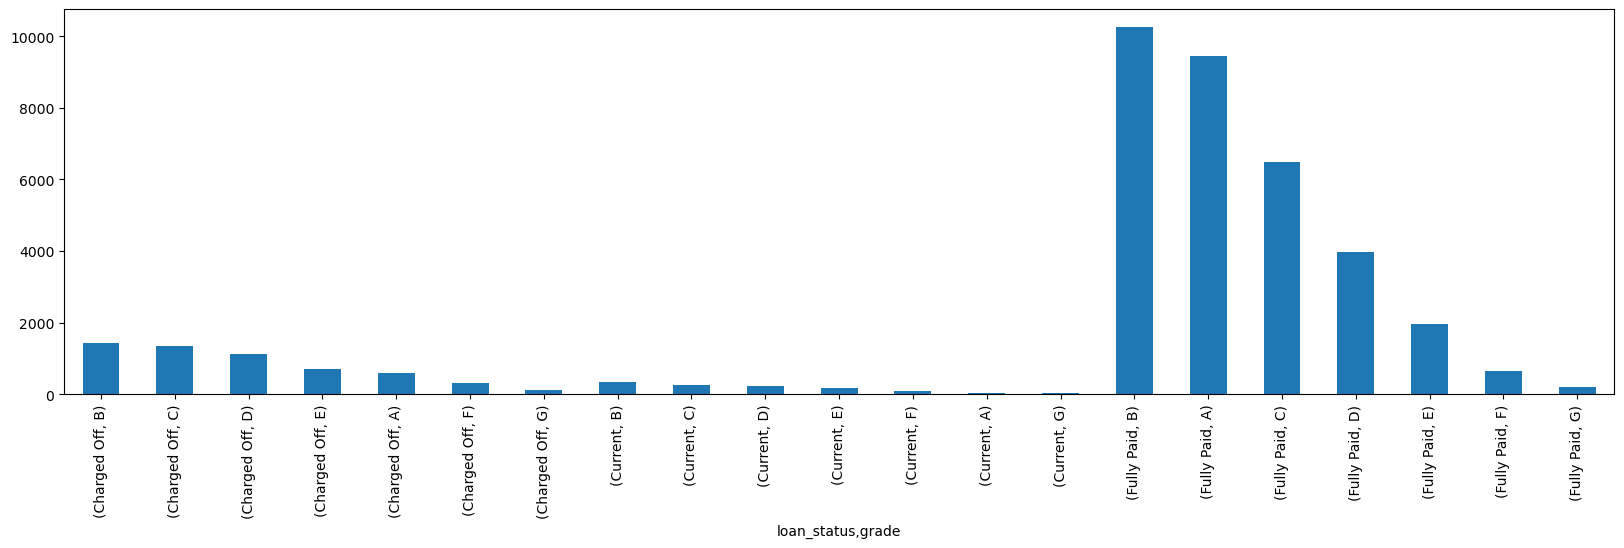

In [882]:
chart_for_categorical_variables('loan_status', 'grade')


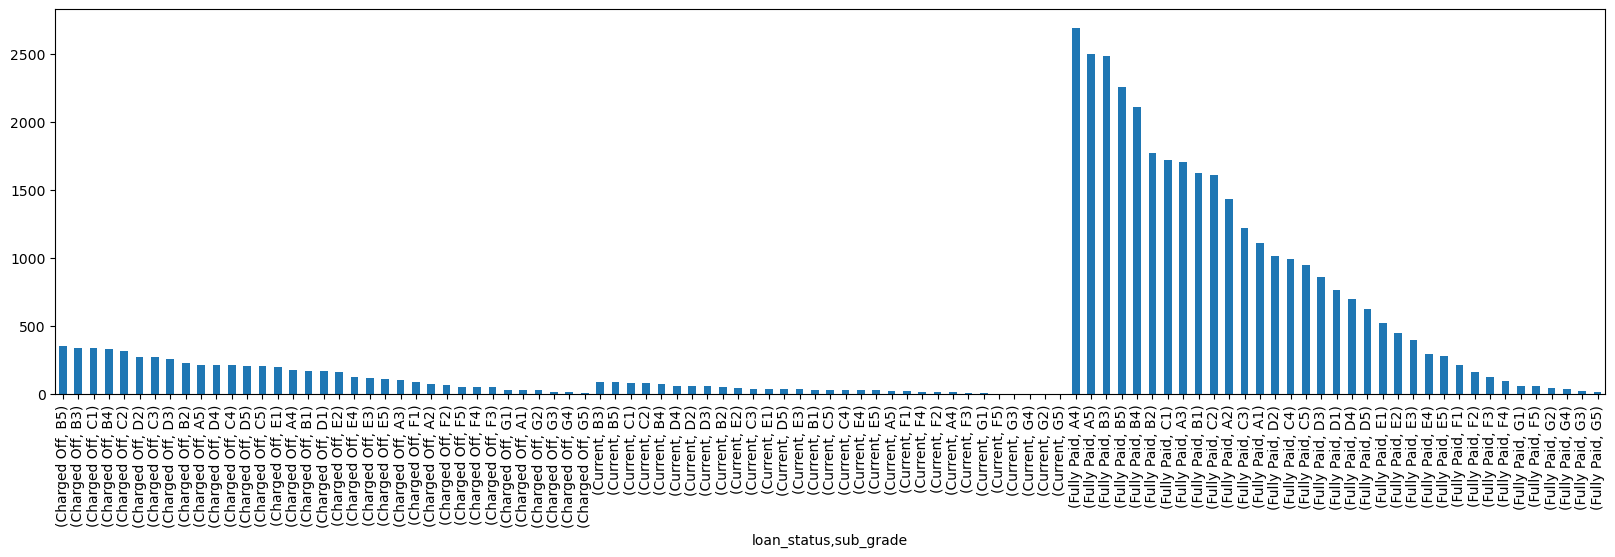

In [883]:
chart_for_categorical_variables('loan_status', 'sub_grade')


In [884]:
# chart_for_categorical_variables('loan_status', 'emp_title')


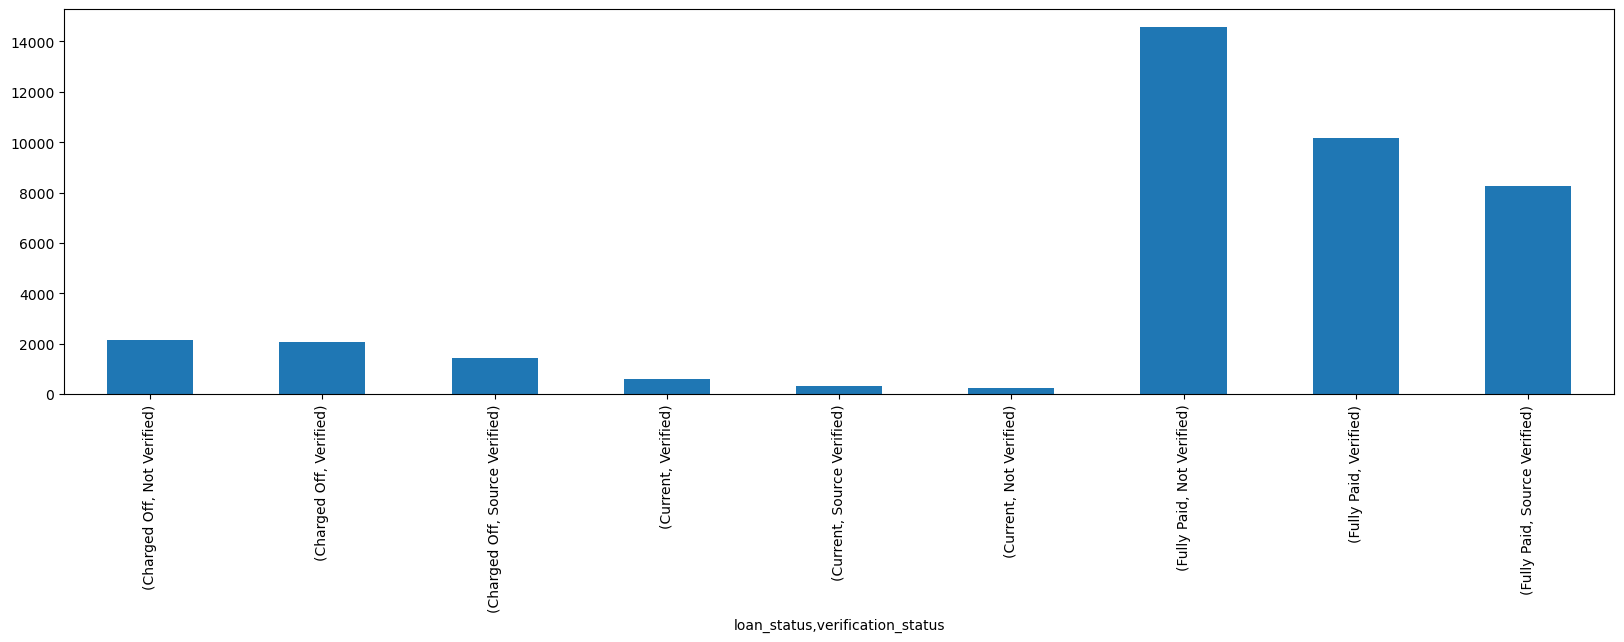

In [885]:
chart_for_categorical_variables('loan_status', 'verification_status')


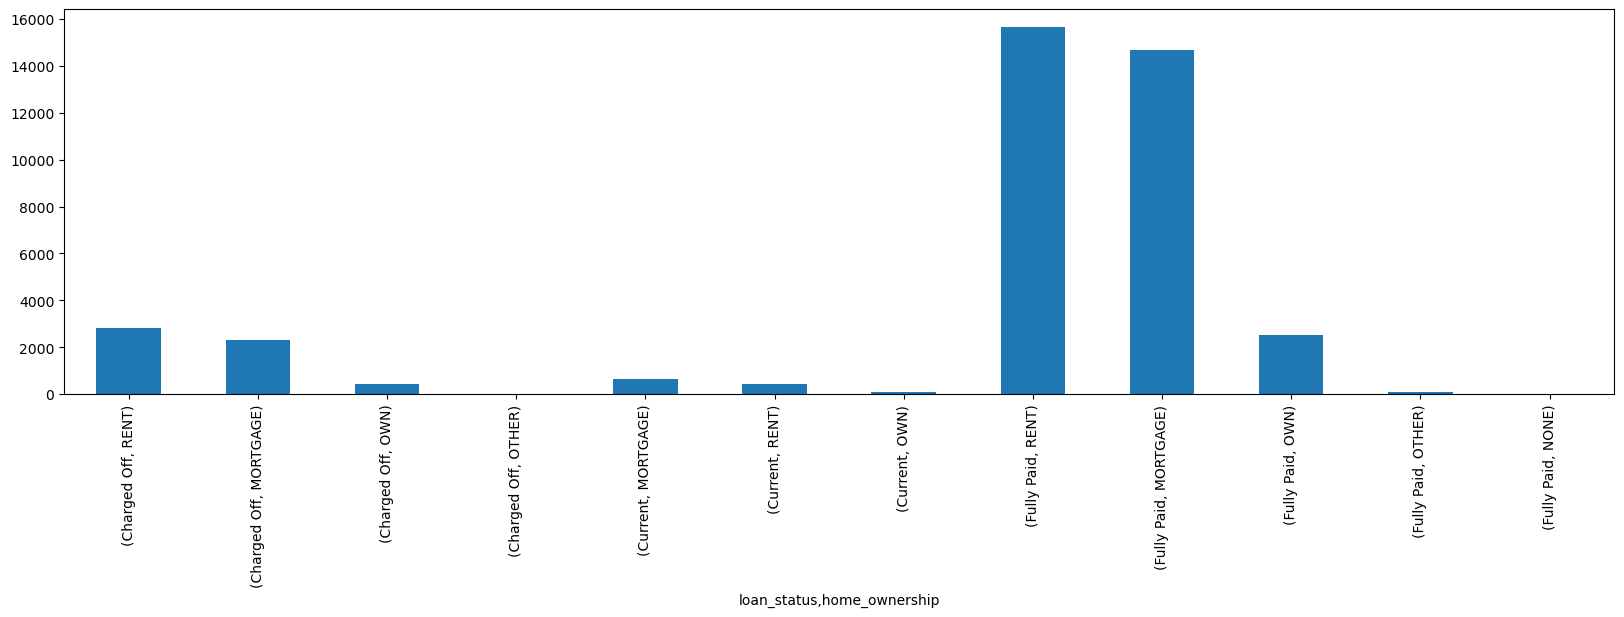

In [886]:
chart_for_categorical_variables('loan_status', 'home_ownership')

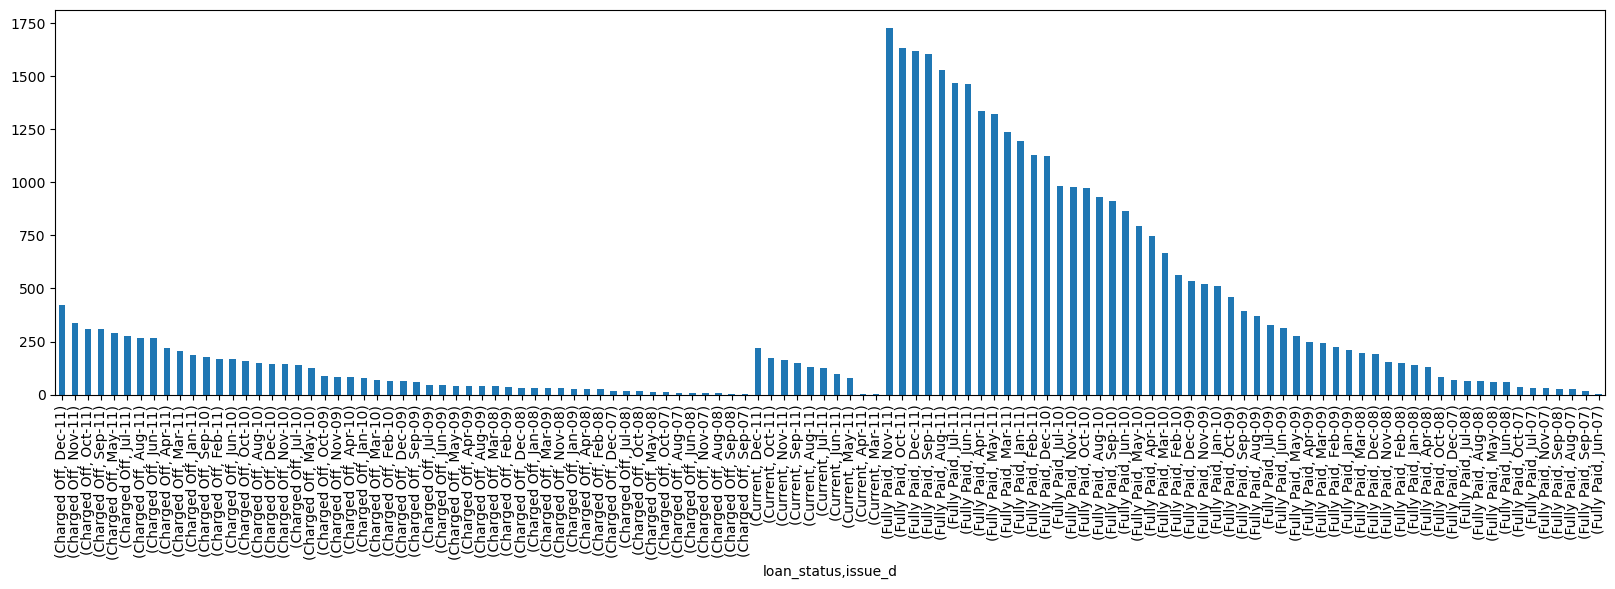

In [887]:
chart_for_categorical_variables('loan_status', 'issue_d')


In [888]:
# chart_for_categorical_variables('loan_status', 'url')


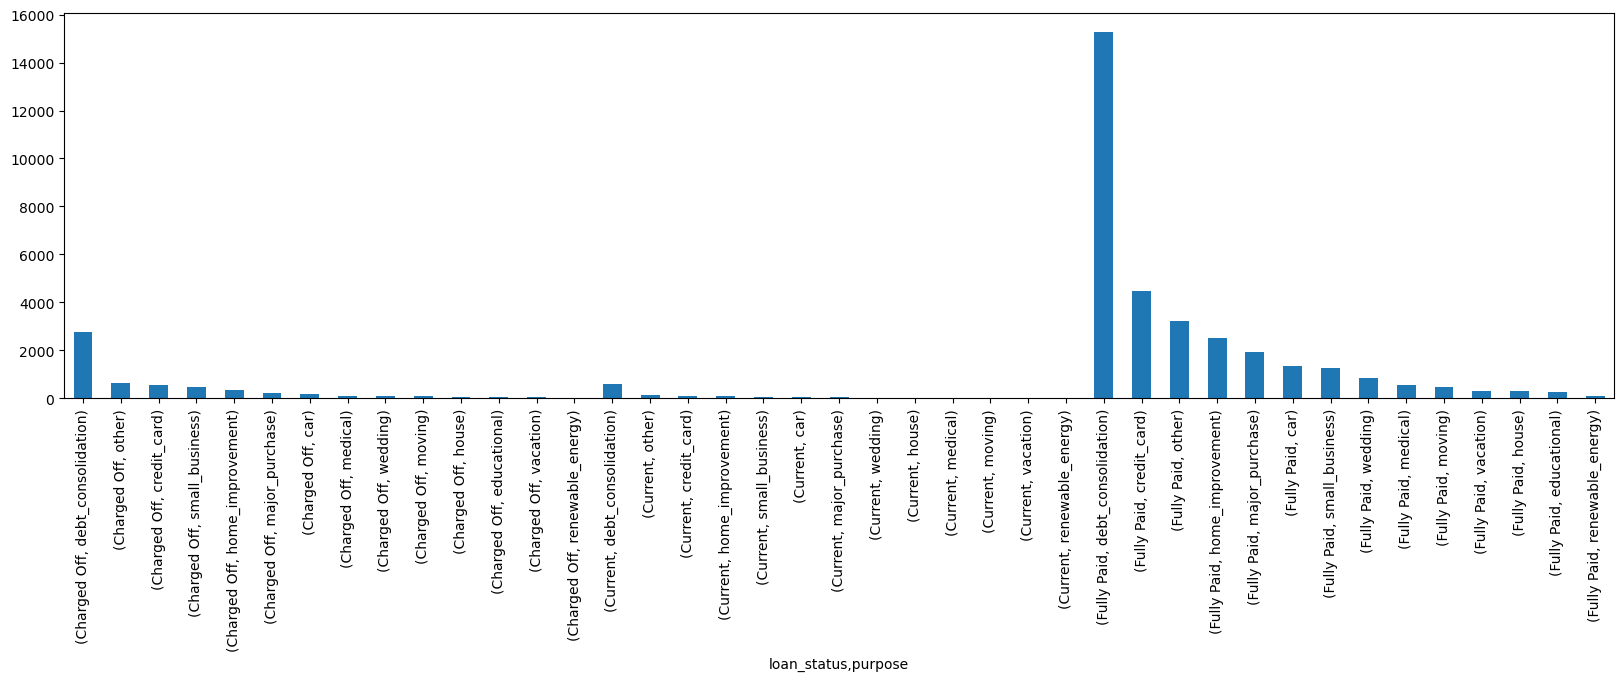

In [889]:

chart_for_categorical_variables('loan_status', 'purpose')

In [890]:
# chart_for_categorical_variables('loan_status', 'title')

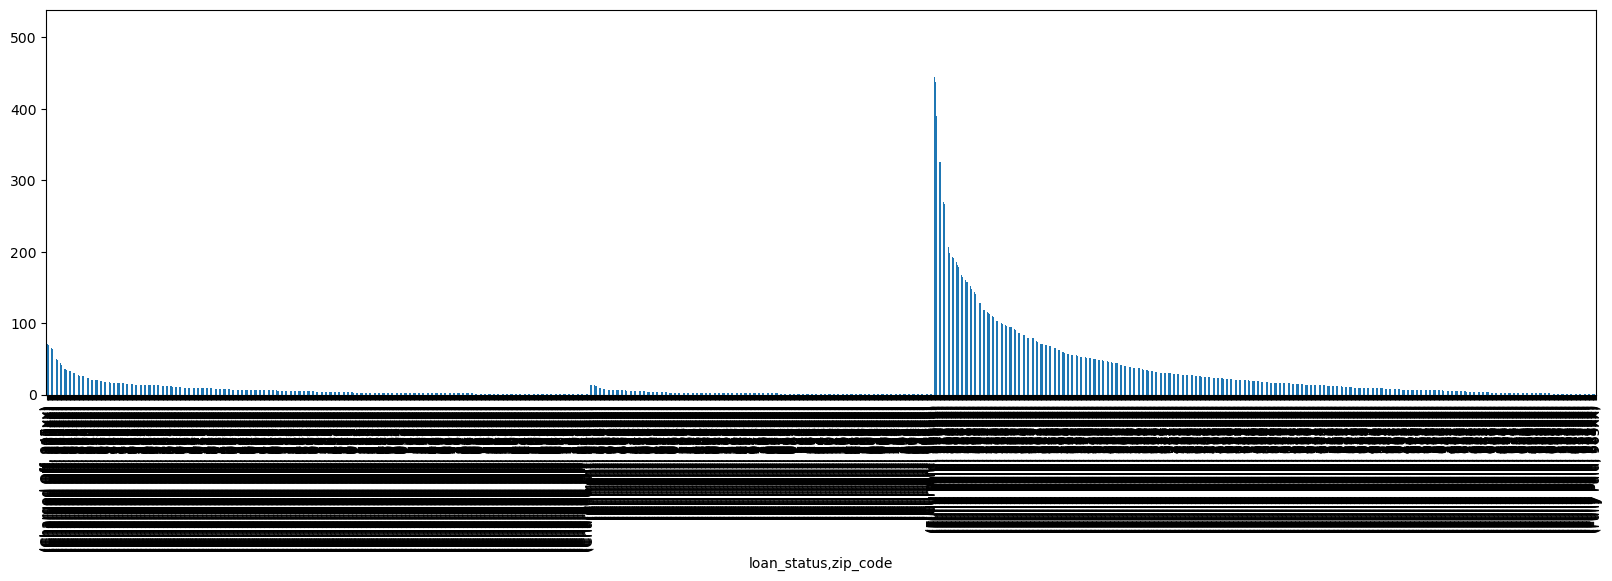

In [891]:
chart_for_categorical_variables('loan_status', 'zip_code')


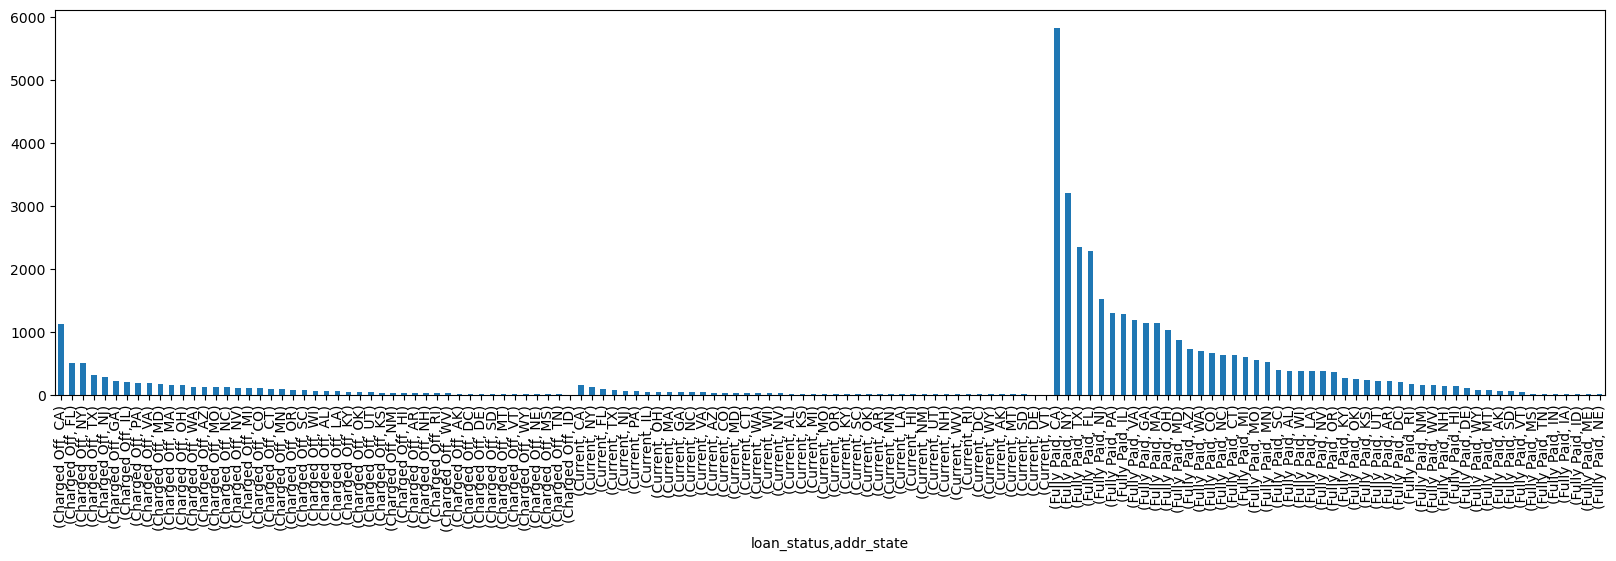

In [892]:
chart_for_categorical_variables('loan_status', 'addr_state')


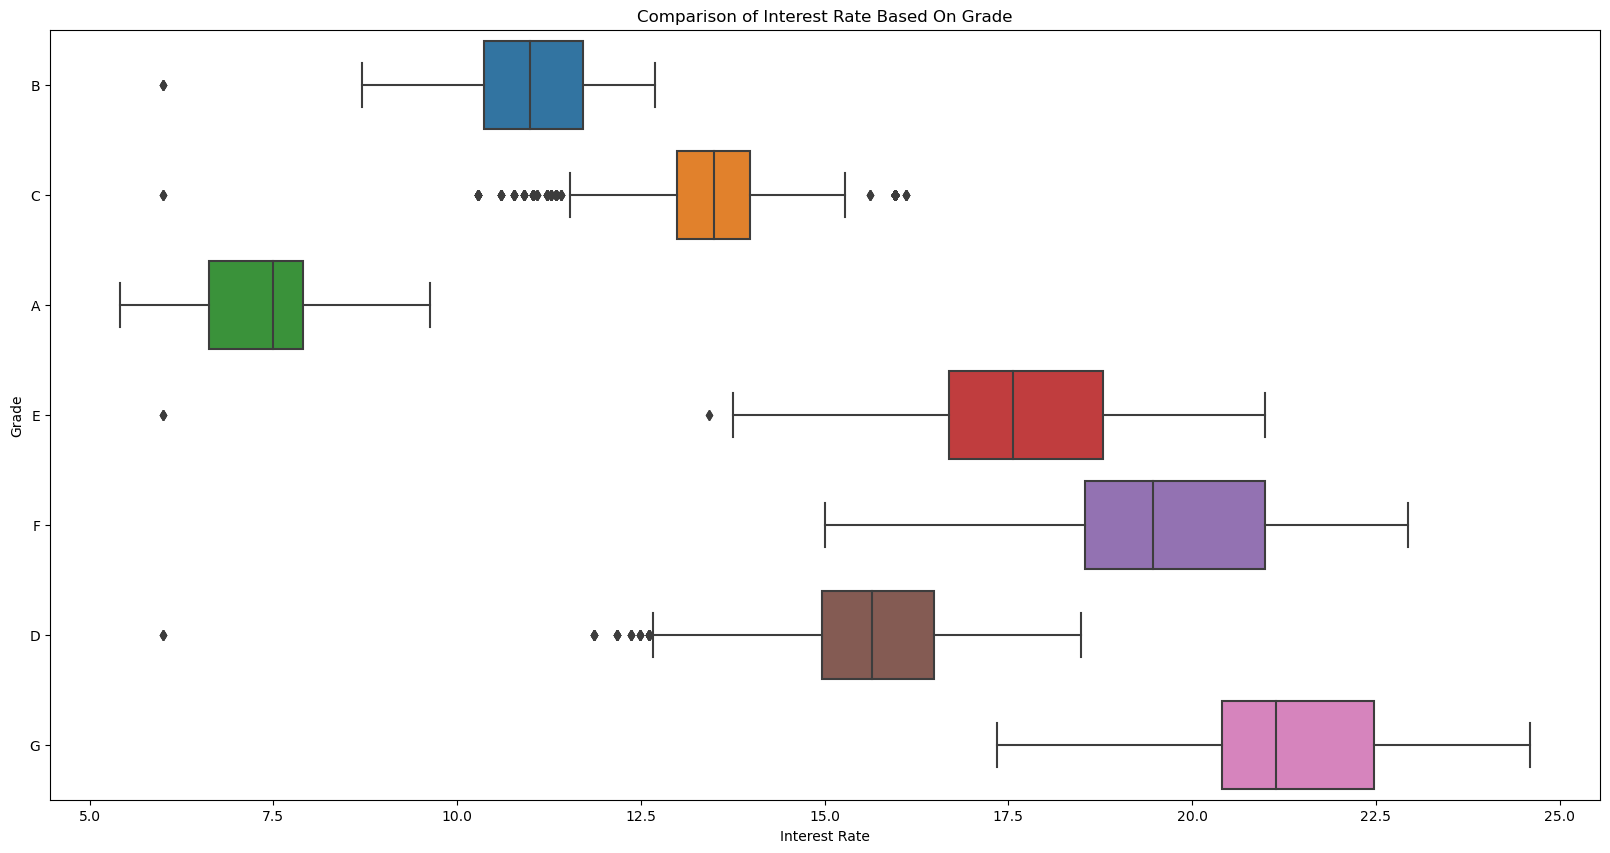

In [893]:




# Comparison of interest rate based on grade
plt.figure(figsize=(20,10))
sns.boxplot(data=df,x='int_rate',y='grade')
plt.xlabel('Interest Rate')
plt.ylabel('Grade')
plt.title('Comparison of Interest Rate Based On Grade',fontsize=12)
plt.show()

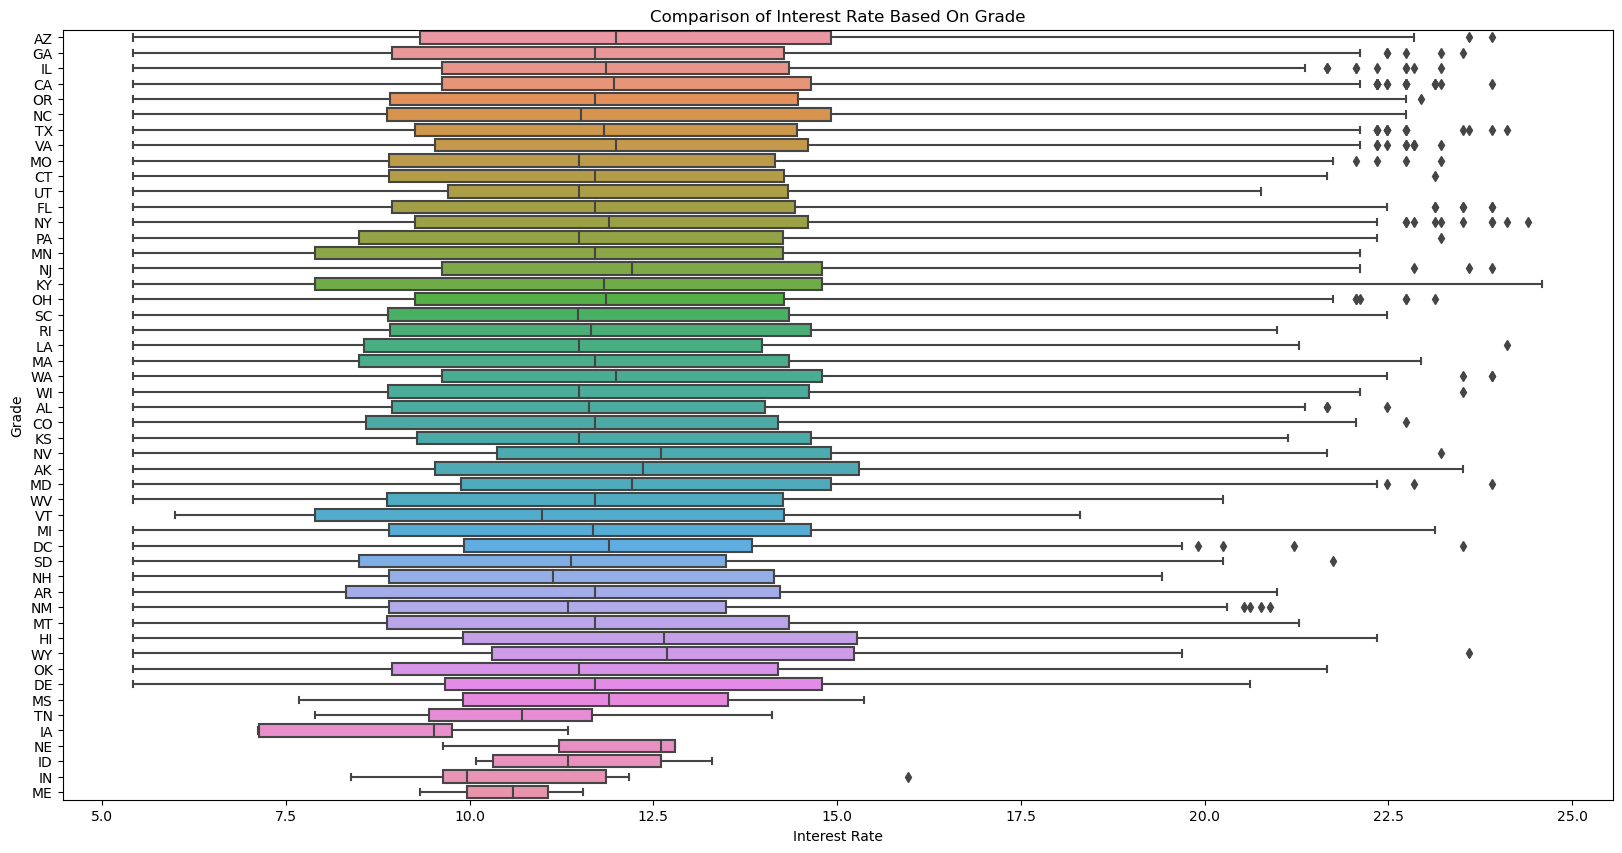

In [894]:


# Comparison of interest rate based on grade
plt.figure(figsize=(20,10))
sns.boxplot(data=df,x='int_rate',y='addr_state')
plt.xlabel('Interest Rate')
plt.ylabel('Grade')
plt.title('Comparison of Interest Rate Based On Grade',fontsize=12)
plt.show()



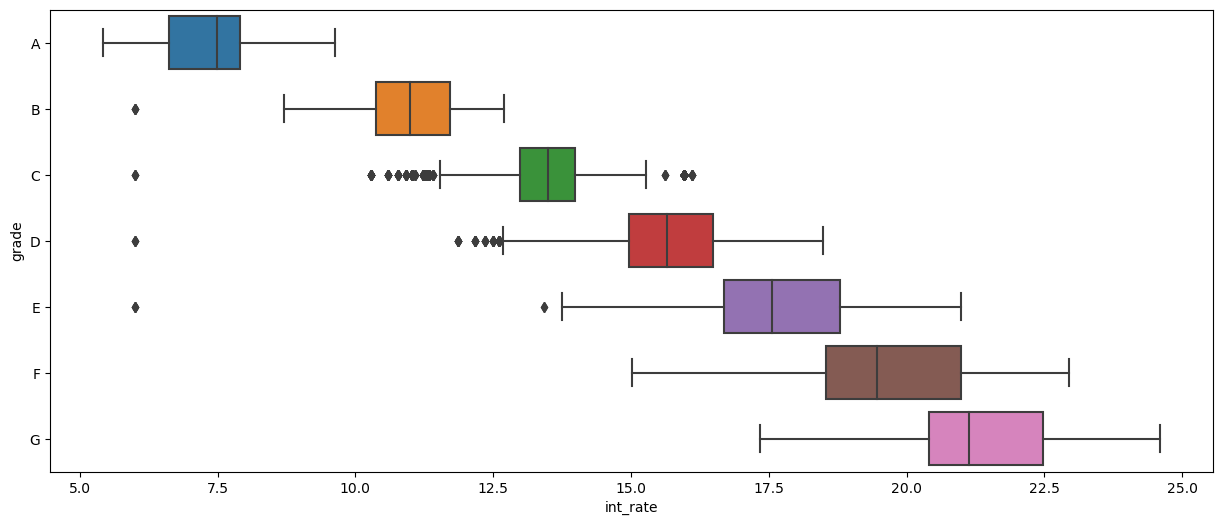

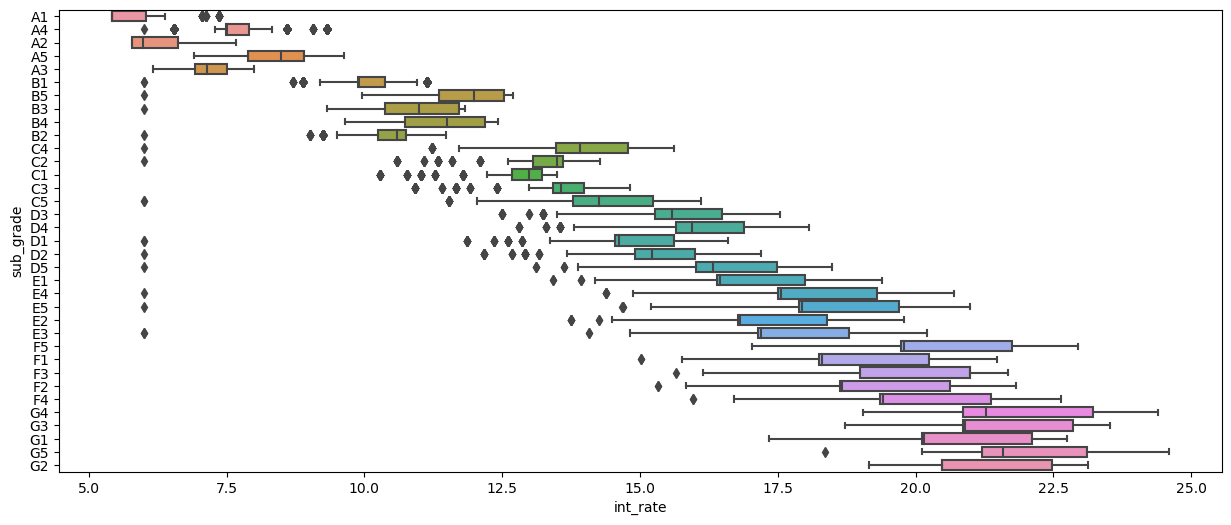

In [895]:
# Comparison of interest rate based on grade

fig, axs = plt.subplots(ncols=1, figsize=(15,6))
sns.boxplot(x='int_rate', y='grade', data=df.sort_values('grade'))
plt.show()



fig, axs = plt.subplots(ncols=1, figsize=(15,6))
sns.boxplot(x='int_rate', y='sub_grade', data=df.sort_values('grade'))
plt.show()




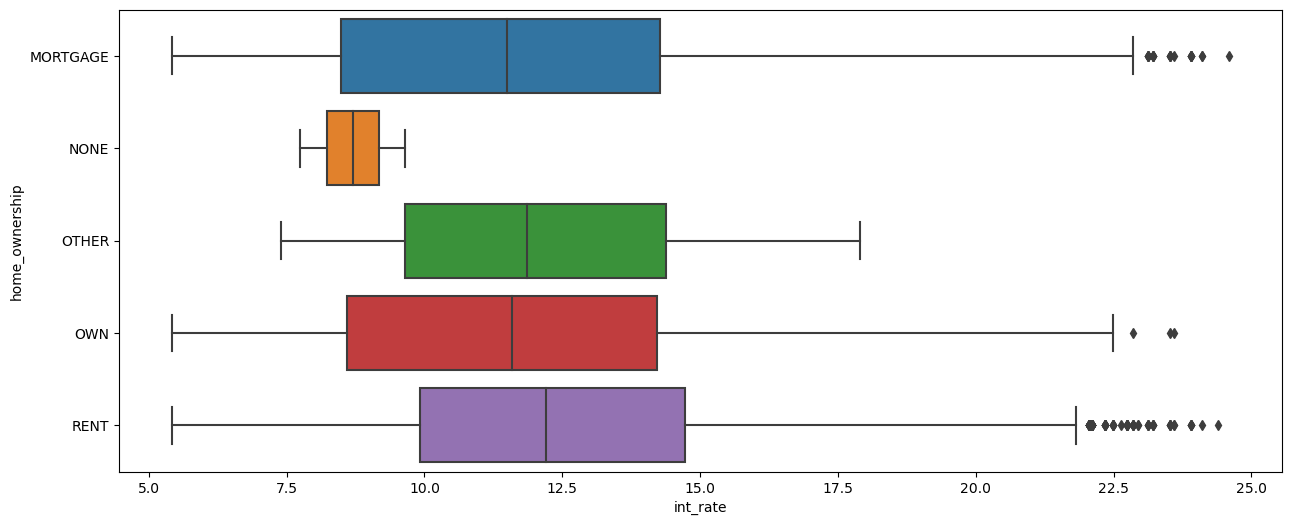

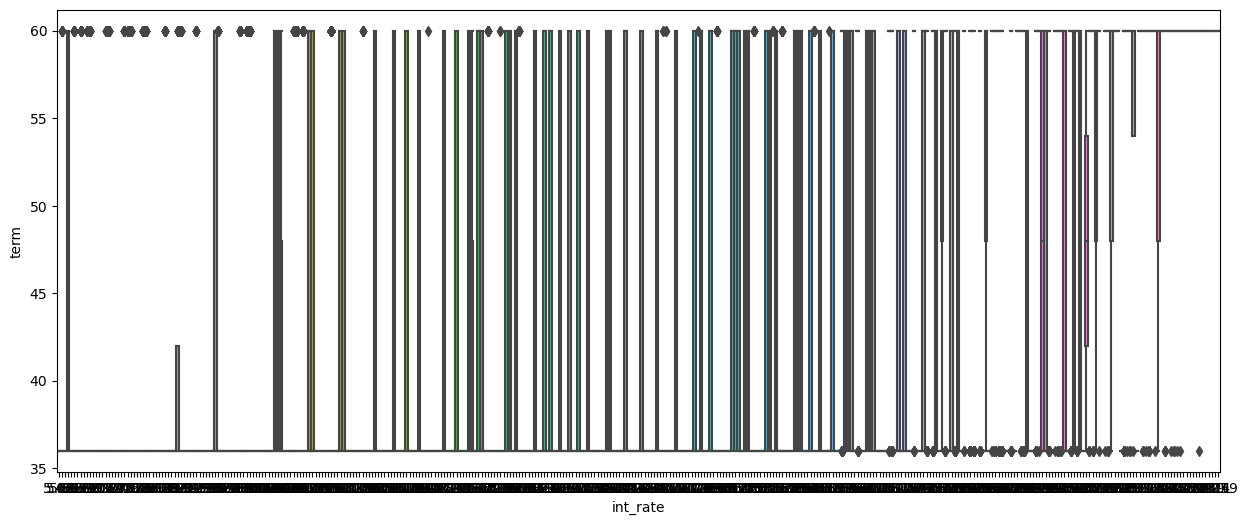

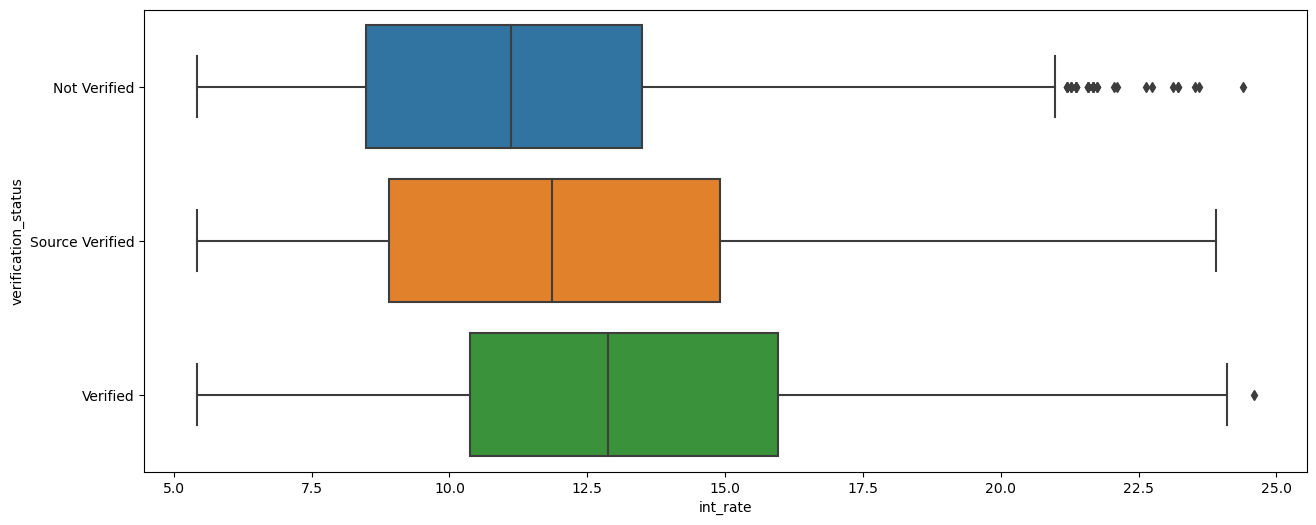

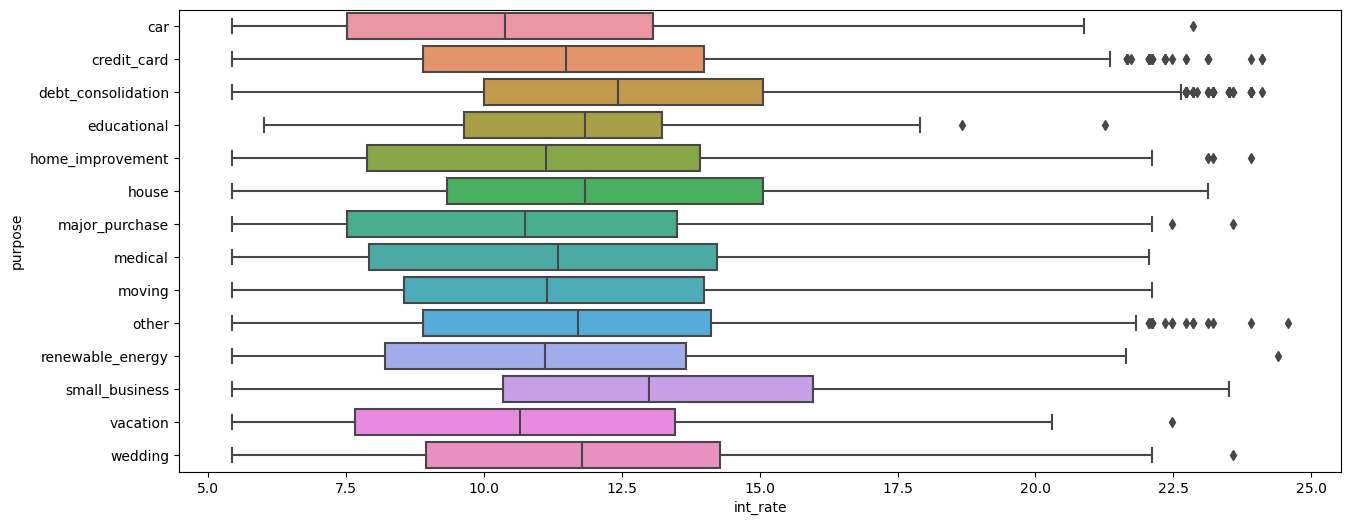

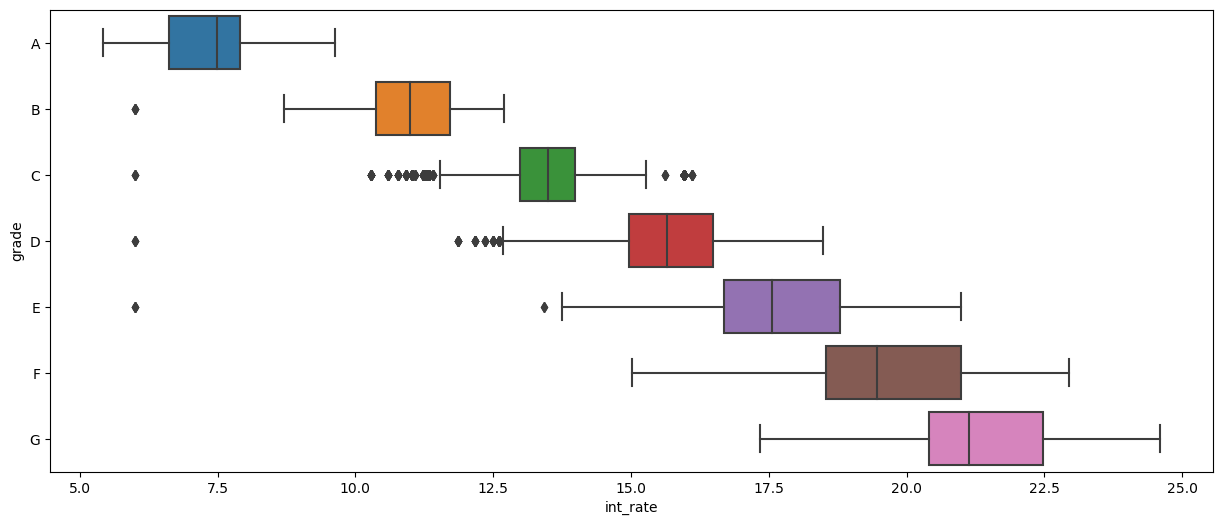

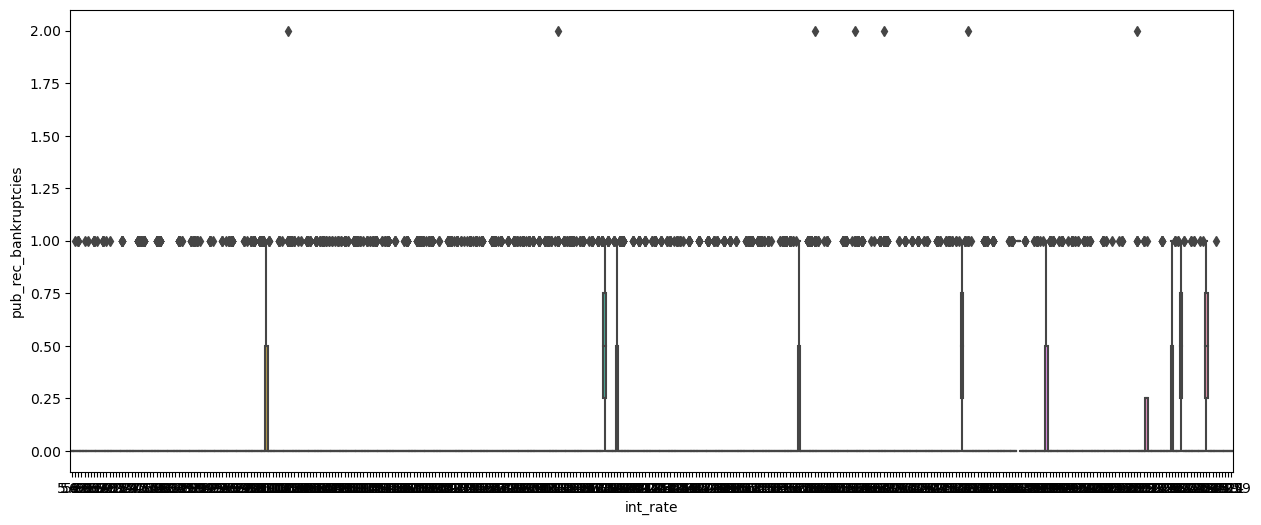

In [896]:
cat_variables = ['home_ownership', 'term', 'verification_status', 'purpose', 'grade', 'pub_rec_bankruptcies'] 


def create_categorical_boxplot(colname):
    fig, axs = plt.subplots(ncols=1, figsize=(15,6))
    sns.boxplot(x='int_rate', y=colname, data=df.sort_values(colname))
    plt.show()


for colname in cat_variables:
    create_categorical_boxplot(colname)


In [897]:
df.shape

(39717, 42)

In [898]:
df.columns    

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'url', 'purpose', 'zip_code', 'addr_state', 'dti',
       'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths',
       'mths_since_last_delinq', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'pub_rec_bankruptcies'],
      dtype='object')

<p><span style="color: #0000ff;">Using dictionary description we found that we have few columns which denote date information and in year and month format and they are type object in the dataframe which cannot be used for analysis so cleaning up all these columns to change the dtype to datetime. <br />Data time columns :</span></p>
<p><span style="color: #0000ff;"><strong>issue_d</strong><br /><strong>earliest_cr_line</strong><br /><strong>last_pymnt_d</strong><br /><strong>last_credit_pull_d</strong><br /></span></p>

In [899]:

list_date = ['issue_d', 'earliest_cr_line', 'last_credit_pull_d', 'last_pymnt_d']

for date in list_date:
    mean = (df[date].isnull().mean()*100)
    print ("Checking for column {0}, does not contain any null {1}, percentage {2}%".format(date, mean == 0, mean))

Checking for column issue_d, does not contain any null True, percentage 0.0%
Checking for column earliest_cr_line, does not contain any null True, percentage 0.0%
Checking for column last_credit_pull_d, does not contain any null False, percentage 0.0050356270614598285%
Checking for column last_pymnt_d, does not contain any null True, percentage 0.0%


Can confirm the same from info function

In [900]:
df[list_date].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   issue_d             39717 non-null  object
 1   earliest_cr_line    39717 non-null  object
 2   last_credit_pull_d  39715 non-null  object
 3   last_pymnt_d        39717 non-null  object
dtypes: object(4)
memory usage: 1.2+ MB


<p><span style="color: #0000ff;">So all these below columns does not contain any null values<br /></span><span style="color: #0000ff;"><strong>issue_d</strong><br /><strong>earliest_cr_line</strong><br /><strong>last_pymnt_d</strong><br /><strong>last_credit_pull_d</strong><br /></span></p>
<p><span style="color: #0000ff;"></p>


### lets start from issue_d : check the distribution of month which the loan was funded
### as part of problem statetment : the loan data given : for all loans issued through the time period 2007 to 2011, so check the value counts split the issue data into month issued and year loan was issued


In [901]:
df.issue_d = pd.to_datetime(df.issue_d, format='%b-%y', errors='coerce')
df = df.dropna(subset=['issue_d'])
df['issue_d_month'] = df['issue_d'].dt.month
df['issue_d_year'] = df['issue_d'].dt.year
df.issue_d.value_counts()

2011-12-01    2260
2011-11-01    2223
2011-10-01    2114
2011-09-01    2063
2011-08-01    1928
2011-07-01    1870
2011-06-01    1827
2011-05-01    1689
2011-04-01    1562
2011-03-01    1443
2011-01-01    1380
2011-02-01    1297
2010-12-01    1267
2010-10-01    1132
2010-11-01    1121
2010-07-01    1119
2010-09-01    1086
2010-08-01    1078
2010-06-01    1029
2010-05-01     920
2010-04-01     827
2010-03-01     737
2010-02-01     627
2009-11-01     602
2009-12-01     598
2010-01-01     589
2009-10-01     545
2009-09-01     449
2009-08-01     408
2009-07-01     374
2009-06-01     356
2009-05-01     319
2009-04-01     290
2009-03-01     276
2009-02-01     260
2009-01-01     239
2008-03-01     236
2008-12-01     223
2008-11-01     184
2008-02-01     174
2008-01-01     171
2008-04-01     155
2008-10-01      96
2007-12-01      85
2008-07-01      83
2008-05-01      71
2008-08-01      71
2008-06-01      66
2007-10-01      47
2007-11-01      37
2007-08-01      33
2008-09-01      32
2007-07-01  

### earliest_cr_line : check the distribution , month the borrower's earliest reported credit line was opened



In [902]:
df.earliest_cr_line = pd.to_datetime(df.earliest_cr_line, format='%b-%y', errors='coerce')
df = df.dropna(subset=['earliest_cr_line'])
df['earliest_cr_line_month'] = df['earliest_cr_line'].dt.month
df['earliest_cr_line_year'] = df['earliest_cr_line'].dt.year
df.earliest_cr_line.value_counts()

1998-11-01    370
1999-10-01    366
1998-12-01    348
2000-10-01    346
1997-12-01    329
             ... 
2066-02-01      1
2061-12-01      1
2054-10-01      1
1972-06-01      1
1974-10-01      1
Name: earliest_cr_line, Length: 526, dtype: int64

In [903]:
## Axe the rows which has invalid data , loan issue is between 2007 and 2011

df = df[ (df.issue_d_year >= 2007) &(df.issue_d_year <= 2011)]
df.shape

(39717, 46)

### last_credit_pull_d : check the distribution , most recent month LC pulled credit for this loan

In [904]:
df.last_credit_pull_d = pd.to_datetime(df.last_credit_pull_d, format='%b-%y', errors='coerce')
df = df.dropna(subset=['last_credit_pull_d'])
df['last_credit_pull_d_month'] = df['last_credit_pull_d'].dt.month
df['last_credit_pull_d_year'] = df['last_credit_pull_d'].dt.year
df.last_credit_pull_d.value_counts()

2016-05-01    10308
2016-04-01     2547
2016-03-01     1123
2013-02-01      843
2016-02-01      736
              ...  
2008-05-01        1
2008-06-01        1
2008-07-01        1
2007-05-01        1
2007-07-01        1
Name: last_credit_pull_d, Length: 106, dtype: int64

### last_pymnt_d : check the distribution , Last month payment was received



In [905]:
df.last_pymnt_d = pd.to_datetime(df.last_pymnt_d, format='%b-%y', errors='coerce')
df = df.dropna(subset=['last_pymnt_d'])
df['last_pymnt_dmonth'] = df['last_pymnt_d'].dt.month
df['last_pymnt_dyear'] = df['last_pymnt_d'].dt.year
df.last_pymnt_d.value_counts()

2016-05-01    1256
2013-03-01    1026
2014-12-01     945
2013-05-01     907
2013-02-01     869
              ... 
2008-06-01      10
2008-11-01      10
2008-03-01       5
2008-01-01       4
2008-02-01       1
Name: last_pymnt_d, Length: 101, dtype: int64

# Univariant Analysis 

In [906]:
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
from pandas.api.types import is_object_dtype

### Now looking at the loan_status, for analysis we are interested in all three categories , FullyPaid / Current / ChargedOff customer, to calculate the profit loss a business can afford

In [907]:
df.loan_status = df.loan_status.apply(lambda x : "Normal" if x != "Charged Off" else x)
df['offender'] = df.loan_status.apply(lambda x : 1 if x == "Charged Off" else 0)
df.offender.value_counts()

0    34089
1     5555
Name: offender, dtype: int64

### check the default rate using the defaulted column

In [908]:
df.offender.mean()*100

14.012208657047726

#### Analysis for the offerder column, shows that approx 14% of the loans have defaulted / offended.

In [909]:
offenderValueCount = df.loan_status.value_counts(normalize=True)*100
offenderValueCount

Normal         85.987791
Charged Off    14.012209
Name: loan_status, dtype: float64

In [910]:
offenderPercentage = offenderValueCount[1]
offenderPercentage

14.012208657047726

Text(0, 0.5, '% loan recovered')

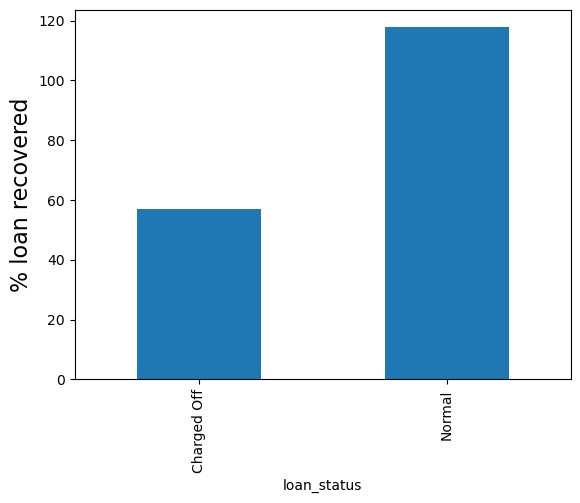

In [911]:
grouped_by_total_payment = df.groupby('loan_status').total_pymnt.sum()
grouped_by_loan_amount =  df.groupby('loan_status').loan_amnt.sum()
profit_loss_rec = ((grouped_by_total_payment/grouped_by_loan_amount)*100).round(2)
ax = profit_loss_rec.plot(kind="bar")
ax.set_ylabel('% loan recovered', fontsize=16)

In [912]:
profit_loss_rec

loan_status
Charged Off     56.92
Normal         117.68
dtype: float64

## So from above charts , only 57% of loans are recovered and out of fully recovered loans 17% is the profit from above plot

In [913]:
#So Max offender % bisuness can afford with out loss
print(profit_loss_rec) 
maxOffenderPerBusinessCanAfford = offenderPercentage + (offenderPercentage * (profit_loss_rec[1] - 100)/100)
maxOffenderPerBusinessCanAfford = maxOffenderPerBusinessCanAfford.round(2)
print("Max offenders business can afford {0}".format(maxOffenderPerBusinessCanAfford))

loan_status
Charged Off     56.92
Normal         117.68
dtype: float64
Max offenders business can afford 16.49


#### From Above its clear that business can afford 16.49% of offernders any variable which increases % of offenders would lead to loss of business

In [914]:
#All numeric columns:
#  2   loan_amnt                39717 non-null  int64  
#  3   funded_amnt              39717 non-null  int64  
#  4   funded_amnt_inv          39717 non-null  float64
#  5   term                     39717 non-null  int64  
#  6   int_rate                 39717 non-null  float64
#  7   installment              39717 non-null  float64
#  13  annual_inc               39717 non-null  float64
#  22  dti                      39717 non-null  float64
#  23  delinq_2yrs              39717 non-null  int64  
#  25  inq_last_6mths           39717 non-null  int64  
#  26  open_acc                 39717 non-null  int64  
#  27  pub_rec                  39717 non-null  int64  
#  28  revol_bal                39717 non-null  int64  
#  29  revol_util               39667 non-null  float64
#  30  total_acc                39717 non-null  int64  
#  31  out_prncp                39717 non-null  float64
#  32  out_prncp_inv            39717 non-null  float64
#  33  total_pymnt              39717 non-null  float64
#  34  total_pymnt_inv          39717 non-null  float64
#  35  total_rec_prncp          39717 non-null  float64
#  36  total_rec_int            39717 non-null  float64
#  37  total_rec_late_fee       39717 non-null  float64
#  38  recoveries               39717 non-null  float64
#  39  collection_recovery_fee  39717 non-null  float64
#  41  last_pymnt_amnt          39717 non-null  float64
#  43  pub_rec_bankruptcies     39020 non-null  float64
    

In [915]:
df.offender.describe()

count    39644.000000
mean         0.140122
std          0.347118
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: offender, dtype: float64

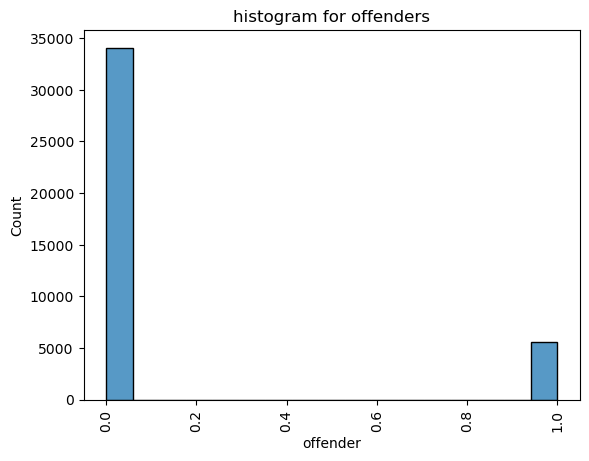

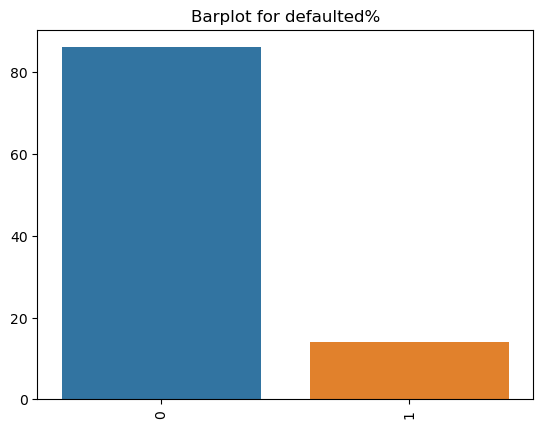

In [916]:

sns.histplot(df.offender) #hue -> TODO
plt.title("histogram for offenders")
plt.xticks(rotation=90)
plt.show()

OffenderPercentage=df[df.offender == True].offender.count()/df.offender.count()*100
NonOfferderPercentage=df[df.offender == False].offender.count()/df.offender.count()*100

sns.barplot(y = [OffenderPercentage,NonOfferderPercentage],orient="v",x=[1,0])
plt.title("Barplot for defaulted%")
plt.xticks(rotation=90)
plt.show()


In [917]:
create_boxplot_and_distplot('loan_amnt', "h")


NameError: name 'create_boxplot_and_distplot' is not defined

In [ ]:
#Now drop outliers from the col series and check the plots
df = drop_outliers_from_series('loan_amnt')

create_boxplot_and_distplot('loan_amnt', "h")

In [ ]:
create_boxplot_and_distplot('funded_amnt', "h")


In [ ]:
#Now drop outliers from the col series and check the plots
df = drop_outliers_from_series('funded_amnt')

create_boxplot_and_distplot('funded_amnt', "h")

In [ ]:
create_boxplot_and_distplot('funded_amnt_inv')


In [ ]:
#Now drop outliers from the col series and check the plots
df = drop_outliers_from_series('funded_amnt_inv')

create_boxplot_and_distplot('funded_amnt_inv', "h")

In [ ]:
create_boxplot_and_distplot('annual_inc', 'h') #vertical boxplot does not look good for analysis


In [ ]:
#Now drop outliers from the col series and check the plots
df = drop_outliers_from_series('annual_inc')

create_boxplot_and_distplot('annual_inc', "h")

In [ ]:
create_boxplot_and_distplot('installment')


In [ ]:
#Now drop outliers from the col series and check the plots
df = drop_outliers_from_series('installment')

create_boxplot_and_distplot('installment', "h")

In [ ]:
create_boxplot_and_distplot('int_rate') 


In [ ]:
#Now drop outliers from the col series and check the plots
df = drop_outliers_from_series('int_rate')

create_boxplot_and_distplot('int_rate', "h")

In [ ]:
create_boxplot_and_distplot('dti')

In [ ]:
#Now drop outliers from the col series and check the plots
df = drop_outliers_from_series('dti')

create_boxplot_and_distplot('dti', "h")

In [ ]:
create_boxplot_and_distplot('delinq_2yrs')
create_countplot('delinq_2yrs')

In [ ]:
#Now drop outliers from the col series and check the plots
#df = drop_outliers_from_series('delinq_2yrs')
#create_boxplot_and_distplot('delinq_2yrs', "h")

In [ ]:

create_boxplot_and_distplot('inq_last_6mths') 
create_countplot('inq_last_6mths') 

In [ ]:
#Now drop outliers from the col series and check the plots
#df = drop_outliers_from_series('inq_last_6mths')

#create_boxplot_and_distplot('inq_last_6mths', "h")

In [ ]:
create_boxplot_and_distplot('open_acc') 
create_countplot('open_acc') 

In [ ]:
#Now drop outliers from the col series and check the plots
#df = drop_outliers_from_series('open_acc')

#create_boxplot_and_distplot('open_acc', "h")

In [ ]:
print(df['pub_rec'].describe())
#create_boxplot_and_distplot('pub_rec', 'h')
#create_countplot('pub_rec')

In [ ]:
create_boxplot_and_distplot('revol_bal')

In [ ]:
#Now drop outliers from the col series and check the plots
df = drop_outliers_from_series('revol_bal')

create_boxplot_and_distplot('revol_bal')

In [ ]:
# The amount of credit the borrower is using relative to all available revolving credit
create_boxplot_and_distplot('revol_util')
# create_countplot('revol_util')

In [ ]:
create_boxplot_and_distplot('total_acc')
# create_countplot('total_acc')

In [ ]:
create_boxplot_and_distplot('out_prncp')

In [ ]:

create_boxplot_and_distplot('out_prncp_inv')

In [ ]:
create_boxplot_and_distplot('total_pymnt')

In [ ]:
create_boxplot_and_distplot('total_pymnt_inv')

In [ ]:
create_boxplot_and_distplot('total_rec_prncp')

In [ ]:
create_boxplot_and_distplot('total_rec_int')

In [ ]:
create_boxplot_and_distplot('total_rec_late_fee')

In [ ]:
create_boxplot_and_distplot('recoveries')

In [ ]:
create_boxplot_and_distplot('collection_recovery_fee')

In [ ]:
create_boxplot_and_distplot('last_pymnt_amnt')

In [ ]:
create_boxplot_and_distplot('pub_rec_bankruptcies')


In [ ]:
df.emp_length.value_counts()

#### emp_length : Employment length in years. cleaning up unwanted values from this column

In [ ]:
df.emp_length = df.emp_length.astype(str).apply(lambda x : x.replace("+","").replace(" years","").replace(" year","").replace("< 1","0"))

df['emp_length'] = df['emp_length'].astype(float)

In [ ]:
df.emp_length.value_counts()

In [ ]:
create_boxplot_and_distplot('emp_length')

### categorical variables

In [ ]:
cat_variables = ['home_ownership', 'term', 'verification_status', 'purpose', 'grade', 'pub_rec_bankruptcies']

# Bivariant Analysis 

In [ ]:
# # Columns to be considered with term

# loan_amnt
# emp_length
# grade
# sub grade
# home_ownership
# verification_status
# purpose
# pub_rec_bankruptcies
# issue_d_month
# addr_state
# zip_code

# TODO Analysis
# pub_rec vs pub_rec_bankruptcies
# pub_rec_bankruptcies vs interest
# pub_rec_bankruptcies vs amount
# pub_rec_bankruptcies vs annual income



In [ ]:
#Plotting offender vs loan amount

#x=drop_outliers_from_series('offender')

sns.boxplot(x='offender', y='loan_amnt', data=df)


In [ ]:
sns.boxplot(x='offender', y='term', data=df)

In [ ]:
sns.boxplot(x='term', y='emp_length', data=df)

In [ ]:
# sns.boxplot(x='term', y='grade',  data=df)

df.groupby(['term', 'grade']).size().unstack().plot(kind='bar', stacked=False)


In [ ]:
# sns.boxplot(x='term', y='home_ownership', data=df)

df.groupby(['term', 'home_ownership']).size().unstack().plot(kind='bar', stacked=True)


In [ ]:

df.groupby(['term', 'verification_status']).size().unstack().plot(kind='bar', stacked=True)


In [ ]:
# Zero bankruptcies are max impact




In [ ]:
# Zero bankruptcies are max impact

df.groupby(['term', 'pub_rec_bankruptcies']).size().unstack().plot(kind='bar', stacked=True)


In [ ]:
# Zip code has no impcat





In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(data=df.corr(),annot=True)

In [ ]:
df.corr()

In [ ]:
corr_mat_table = ['loan_amnt',  'funded_amnt', 'funded_amnt_inv',   'term', 'int_rate',   'installment', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths',    'open_acc',   'pub_rec',    'revol_bal',  'revol_util',            'total_acc',  'out_prncp',  'out_prncp_inv',     'total_pymnt', 'total_pymnt_inv',   'total_rec_prncp',   'total_rec_int',     'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_amnt',   'pub_rec_bankruptcies']

In [ ]:
df[corr_mat_table].corr()

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(data=df[corr_mat_table].corr(), annot=True, cmap='Reds')

### To Drop Cols : after analysis
delinq_2yrs, 
total_acc ,
inq_last_6mths

## TODO check how to build defaulted : check
FICO
Risk_score

In [ ]:
# corr_mat_table = ['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'total_pymnt', 'total_rec_late_fee', 'collection_recovery_fee']

# def plot_offenders_status(col):
#     df.groupby('offender')[col].value_counts().plot(kind='bar')
#     plt.show()


# for col in corr_mat_table:
#     plot_offenders_status(col)



In [ ]:
# df.groupby('addr_state')['offender'].value_counts().plot(kind='bar')
# plt.show()